# ODR (On-time Delivery Rate): 정시 배송 비율

## 데이터 불러오기

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as np

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 프로퍼티 생성
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 한글 폰트가 제대로 설정되었는지 확인
print("현재 설정된 폰트:", plt.rcParams['font.family'])

현재 설정된 폰트: ['NanumGothic']


In [ ]:
customers           = pd.read_csv('/content/drive/MyDrive/멋사_colab/13.데이터톤-19/data/customers_final.csv')    # 고객
locations           = pd.read_csv('/content/drive/MyDrive/멋사_colab/13.데이터톤-19/data/locations_final.csv')    # 지역
order_items         = pd.read_csv('/content/drive/MyDrive/멋사_colab/13.데이터톤-19/data/order_items_final.csv')  # 주문 아이템
orders              = pd.read_csv('/content/drive/MyDrive/멋사_colab/13.데이터톤-19/data/orders_final.csv')       # 주문
payments            = pd.read_csv('/content/drive/MyDrive/멋사_colab/13.데이터톤-19/data/payments_final.csv')     # 지불
products            = pd.read_csv('/content/drive/MyDrive/멋사_colab/13.데이터톤-19/data/products_final.csv')     # 제품
reviews             = pd.read_csv('/content/drive/MyDrive/멋사_colab/13.데이터톤-19/data/reviews_final.csv')      # 리뷰
sellers             = pd.read_csv('/content/drive/MyDrive/멋사_colab/13.데이터톤-19/data/sellers_final.csv')      # 판매자

# orders 확인

In [ ]:
# orders 데이터 확인
orders.head()

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07


In [ ]:
orders.shape

(87955, 7)

## 주문 오류 행 삭제

In [ ]:
# 주문 취소건 6건
orders_canceled = orders[orders['주문 상태'] == 'canceled']

In [ ]:
orders_canceled

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜
2591,ORDER_02596,CUSTOMER_44768,canceled,2019-02-19 19:48:52,2019-02-20 19:57:13,2019-03-21 22:03:51,2019-03-09
7768,ORDER_07781,CUSTOMER_68220,canceled,2017-10-09 00:56:52,2017-10-13 13:36:59,2017-10-16 14:36:59,2017-11-30
51467,ORDER_51548,CUSTOMER_24011,canceled,2017-10-07 14:52:30,2017-10-11 15:07:11,2017-10-14 15:07:11,2017-11-29
52410,ORDER_52492,CUSTOMER_50907,canceled,2017-10-08 20:17:50,2017-10-14 22:45:26,2017-10-19 18:47:43,2017-11-30
81922,ORDER_82044,CUSTOMER_52846,canceled,2017-10-03 21:01:41,2017-10-25 12:14:28,2017-11-08 10:58:34,2017-11-25
83484,ORDER_83608,CUSTOMER_67556,canceled,2017-10-09 15:39:56,2017-10-14 10:40:50,2017-11-09 14:53:50,2017-12-08


In [ ]:
# 주문 취소 건 삭제  -> 6건 삭제
indexes_to_drop = orders[orders['주문 상태'] == 'canceled'].index

# 인덱스를 사용하여 행 삭제
orders.drop(indexes_to_drop, inplace=True)

orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87949 entries, 0 to 87954
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   주문 고유 ID  87949 non-null  object
 1   고객 ID     87949 non-null  object
 2   주문 상태     87949 non-null  object
 3   구매 시간     87949 non-null  object
 4   물류 처리 시간  87949 non-null  object
 5   실제 배송 날짜  87949 non-null  object
 6   기대 배송 날짜  87949 non-null  object
dtypes: object(7)
memory usage: 5.4+ MB


In [ ]:
# 날짜 타입으로 변경
orders['구매 시간'] = pd.to_datetime(orders['구매 시간']).astype('datetime64[ns]')
orders['물류 처리 시간'] = pd.to_datetime(orders['물류 처리 시간']).astype('datetime64[ns]')
orders['실제 배송 날짜'] = pd.to_datetime(orders['실제 배송 날짜']).astype('datetime64[ns]')
orders['기대 배송 날짜'] = pd.to_datetime(orders['기대 배송 날짜']).astype('datetime64[ns]')

In [ ]:
# 타입 변경 확인
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87949 entries, 0 to 87954
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   주문 고유 ID  87949 non-null  object        
 1   고객 ID     87949 non-null  object        
 2   주문 상태     87949 non-null  object        
 3   구매 시간     87949 non-null  datetime64[ns]
 4   물류 처리 시간  87949 non-null  datetime64[ns]
 5   실제 배송 날짜  87949 non-null  datetime64[ns]
 6   기대 배송 날짜  87949 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.4+ MB


# delivery 생성(배송 특화 데이터) -> order기반 + 파생

## 배송 관련 새로운 컬럼 생성

In [ ]:
delivery = orders.copy()

In [ ]:
delivery['제품 준비 기간'] = delivery['물류 처리 시간'] - delivery['구매 시간']
delivery['실제 배송 기간'] = delivery['실제 배송 날짜'] - delivery['물류 처리 시간']
delivery['예상 배송 기간'] = delivery['기대 배송 날짜'] - delivery['구매 시간']
delivery['실제 수령 기간'] = delivery['실제 배송 날짜'] - delivery['구매 시간']
delivery.head()

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,실제 수령 기간
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,2 days 08:58:27,6 days 01:30:13,15 days 13:03:27,8 days 10:28:40
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,3 days 18:11:53,9 days 10:48:43,26 days 04:31:54,13 days 05:00:36
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,0 days 22:27:55,1 days 22:30:28,12 days 02:41:21,2 days 20:58:23
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,1 days 17:00:59,14 days 19:59:51,22 days 02:02:55,16 days 13:00:50
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,5 days 20:57:16,4 days 02:48:05,21 days 10:49:30,9 days 23:45:21


## 배송 오류 행 삭제

In [ ]:
# 실제 배송 기간 오름차순 정렬
delivery_sorted = delivery.sort_values(by='실제 배송 기간')

# 정렬된 데이터프레임 출력 (상위 20개 행만 출력)
delivery_sorted.head(20)

# 배송 기간 0분 및 10분 이하인 케이스 삭제 진행

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,실제 수령 기간
44280,ORDER_44355,CUSTOMER_73449,delivered,2018-07-04 16:29:20,2018-07-20 14:54:59,2018-07-20 14:54:59,2018-08-23,15 days 22:25:39,0 days 00:00:00,49 days 07:30:40,15 days 22:25:39
34975,ORDER_35035,CUSTOMER_06473,delivered,2018-01-19 15:21:44,2018-02-01 18:06:23,2018-02-01 18:06:23,2018-03-08,13 days 02:44:39,0 days 00:00:00,47 days 08:38:16,13 days 02:44:39
16445,ORDER_16473,CUSTOMER_80426,delivered,2018-01-14 15:11:28,2018-02-03 10:50:28,2018-02-03 10:50:28,2018-02-28,19 days 19:39:00,0 days 00:00:00,44 days 08:48:32,19 days 19:39:00
76439,ORDER_76557,CUSTOMER_35107,delivered,2018-01-19 23:12:08,2018-02-01 18:06:52,2018-02-01 18:06:52,2018-02-15,12 days 18:54:44,0 days 00:00:00,26 days 00:47:52,12 days 18:54:44
66586,ORDER_66689,CUSTOMER_44972,delivered,2018-08-03 11:40:08,2018-08-29 09:13:53,2018-08-29 09:13:53,2018-09-04,25 days 21:33:45,0 days 00:00:00,31 days 12:19:52,25 days 21:33:45
86585,ORDER_86713,CUSTOMER_64461,delivered,2017-10-09 23:25:13,2017-10-14 11:03:10,2017-10-14 11:03:10,2017-11-30,4 days 11:37:57,0 days 00:00:00,51 days 00:34:47,4 days 11:37:57
4255,ORDER_04264,CUSTOMER_52806,delivered,2019-03-24 19:51:16,2019-03-27 00:08:32,2019-03-27 00:08:32,2019-04-13,2 days 04:17:16,0 days 00:00:00,19 days 04:08:44,2 days 04:17:16
3277,ORDER_03284,CUSTOMER_85883,delivered,2018-07-23 21:24:59,2018-08-09 18:18:28,2018-08-09 18:18:28,2018-08-15,16 days 20:53:29,0 days 00:00:00,22 days 02:35:01,16 days 20:53:29
74605,ORDER_74718,CUSTOMER_66418,delivered,2018-07-22 10:44:10,2018-08-09 20:50:10,2018-08-09 20:50:10,2018-08-17,18 days 10:06:00,0 days 00:00:00,25 days 13:15:50,18 days 10:06:00
28150,ORDER_28202,CUSTOMER_54024,delivered,2018-07-31 10:00:03,2018-08-22 11:34:02,2018-08-22 11:34:03,2018-08-22,22 days 01:33:59,0 days 00:00:01,21 days 13:59:57,22 days 01:34:00


In [ ]:
# '실제 배송 기간'이 10분(600초) 이상인 행만 필터링
from datetime import timedelta

delivery = delivery[delivery['실제 배송 기간'] > pd.Timedelta(minutes=10)]

In [ ]:
# 날짜 간 차이 계산 결과의 타입은 timedelta64[ns]
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87934 entries, 0 to 87954
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   주문 고유 ID  87934 non-null  object         
 1   고객 ID     87934 non-null  object         
 2   주문 상태     87934 non-null  object         
 3   구매 시간     87934 non-null  datetime64[ns] 
 4   물류 처리 시간  87934 non-null  datetime64[ns] 
 5   실제 배송 날짜  87934 non-null  datetime64[ns] 
 6   기대 배송 날짜  87934 non-null  datetime64[ns] 
 7   제품 준비 기간  87934 non-null  timedelta64[ns]
 8   실제 배송 기간  87934 non-null  timedelta64[ns]
 9   예상 배송 기간  87934 non-null  timedelta64[ns]
 10  실제 수령 기간  87934 non-null  timedelta64[ns]
dtypes: datetime64[ns](4), object(3), timedelta64[ns](4)
memory usage: 8.1+ MB


In [ ]:
delivery['실제 배송 기간'].max(),delivery['제품 준비 기간'].max(),delivery['예상 배송 기간'].max()

(Timedelta('195 days 00:48:53'),
 Timedelta('125 days 18:36:45'),
 Timedelta('155 days 03:15:04'))

In [ ]:
delivery['실제 배송 기간'].min(),delivery['제품 준비 기간'].min(),delivery['예상 배송 기간'].min()

(Timedelta('0 days 00:22:56'),
 Timedelta('0 days 00:00:32'),
 Timedelta('2 days 11:14:06'))

## 배송 예측 성공 OR 실패

In [ ]:
delivery[delivery['실제 배송 날짜'] > delivery['기대 배송 날짜']]

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,실제 수령 기간
17,ORDER_00017,CUSTOMER_01621,delivered,2018-09-18 14:31:30,2018-10-06 17:50:03,2018-10-09 22:23:46,2018-09-28,18 days 03:18:33,3 days 04:33:43,9 days 09:28:30,21 days 07:52:16
21,ORDER_00021,CUSTOMER_30117,delivered,2019-02-20 23:46:53,2019-02-26 22:25:22,2019-03-21 22:03:54,2019-03-12,5 days 22:38:29,22 days 23:38:32,19 days 00:13:07,28 days 22:17:01
31,ORDER_00031,CUSTOMER_53861,delivered,2019-02-17 15:59:46,2019-02-20 23:03:56,2019-03-20 00:59:25,2019-03-20,3 days 07:04:10,27 days 01:55:29,30 days 08:00:14,30 days 08:59:39
37,ORDER_00037,CUSTOMER_60468,delivered,2018-11-24 21:27:48,2018-12-13 21:14:05,2018-12-28 18:59:23,2018-12-21,18 days 23:46:17,14 days 21:45:18,26 days 02:32:12,33 days 21:31:35
50,ORDER_00050,CUSTOMER_46100,delivered,2019-03-09 14:50:15,2019-03-15 00:31:19,2019-04-03 13:28:46,2019-04-02,5 days 09:41:04,19 days 12:57:27,23 days 09:09:45,24 days 22:38:31
...,...,...,...,...,...,...,...,...,...,...,...
87856,ORDER_87989,CUSTOMER_55169,delivered,2019-03-28 23:09:36,2019-03-29 19:59:58,2019-04-26 12:54:39,2019-04-25,0 days 20:50:22,27 days 16:54:41,27 days 00:50:24,28 days 13:45:03
87913,ORDER_88046,CUSTOMER_31496,delivered,2019-03-13 21:48:57,2019-03-14 19:27:23,2019-04-05 19:59:49,2019-04-02,0 days 21:38:26,22 days 00:32:26,19 days 02:11:03,22 days 22:10:52
87937,ORDER_88070,CUSTOMER_02724,delivered,2018-10-12 20:54:11,2018-10-17 17:04:42,2018-11-21 17:06:59,2018-10-31,4 days 20:10:31,35 days 00:02:17,18 days 03:05:49,39 days 20:12:48
87939,ORDER_88072,CUSTOMER_12510,delivered,2019-03-21 19:47:18,2019-03-22 21:11:58,2019-04-11 00:48:31,2019-04-09,1 days 01:24:40,19 days 03:36:33,18 days 04:12:42,20 days 05:01:13


In [ ]:
delivery[delivery['실제 배송 날짜'] < delivery['기대 배송 날짜']]

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,실제 수령 기간
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,2 days 08:58:27,6 days 01:30:13,15 days 13:03:27,8 days 10:28:40
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15,3 days 18:11:53,9 days 10:48:43,26 days 04:31:54,13 days 05:00:36
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26,0 days 22:27:55,1 days 22:30:28,12 days 02:41:21,2 days 20:58:23
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01,1 days 17:00:59,14 days 19:59:51,22 days 02:02:55,16 days 13:00:50
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07,5 days 20:57:16,4 days 02:48:05,21 days 10:49:30,9 days 23:45:21
...,...,...,...,...,...,...,...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09 09:54:05,2018-03-10 11:18:03,2018-03-17 15:08:01,2018-03-28,1 days 01:23:58,7 days 03:49:58,18 days 14:05:55,8 days 05:13:56
87951,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06 12:58:58,2019-02-07 23:22:42,2019-02-28 17:37:56,2019-03-02,1 days 10:23:44,20 days 18:15:14,23 days 11:01:02,22 days 04:38:58
87952,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27 14:46:43,2018-08-28 20:52:26,2018-09-21 11:24:17,2018-09-27,1 days 06:05:43,23 days 14:31:51,30 days 09:13:17,24 days 20:37:34
87953,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08 21:28:27,2019-01-12 15:35:03,2019-01-25 23:32:54,2019-02-15,3 days 18:06:36,13 days 07:57:51,37 days 02:31:33,17 days 02:04:27


In [ ]:
delivery_same = delivery[delivery['실제 배송 날짜'] == delivery['기대 배송 날짜']].shape[0]
delivery_same

0

- 총 배송 건 수 = 87934건
- 실제 배송 날짜보다 실제 배송 날짜가 큰 경우 = 예상보다 늦게 배송된 경우 : 6885건
- 기대 배송 날짜 범주 내에 배송 된 건 수 = 81061건
(6888+81049 = 87934건)

In [ ]:
delivery_success = delivery[delivery['실제 배송 날짜'] < delivery['기대 배송 날짜']].shape[0]
delivery_fail = delivery[delivery['실제 배송 날짜'] > delivery['기대 배송 날짜']].shape[0]
delivery_success, delivery_fail

(81049, 6885)

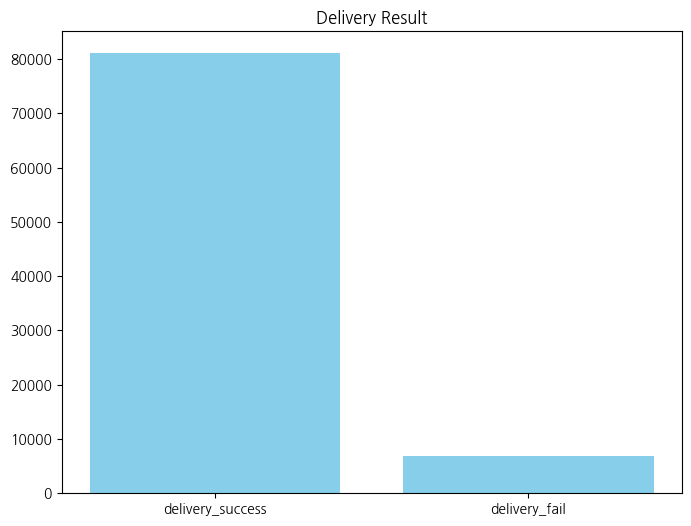

In [ ]:
# 배송 예측 성공 or 실패

x = ['delivery_success', 'delivery_fail']
y = [delivery_success, delivery_fail]
plt.figure(figsize=(8,6))
plt.bar(x, y, color='skyblue')


plt.title('Delivery Result')

plt.show()

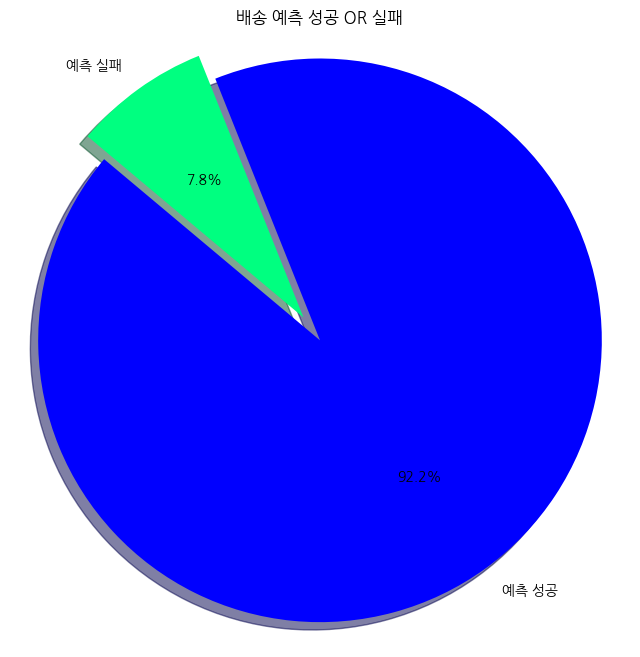

In [ ]:
# 파이 차트 생성
labels = ['예측 성공', '예측 실패']
sizes = [delivery_success, delivery_fail]
colors = plt.cm.winter(np.linspace(0, 1, 2))  # winter 컬러맵에서 두 가지 색상 추출
explode = (0.1, 0)  # Success 항목을 약간 분리

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('배송 예측 성공 OR 실패')
plt.axis('equal')  # 파이 차트를 원형으로 그리기 위해 비율을 동일하게 설정
plt.show()

In [ ]:
len(delivery[delivery['실제 배송 날짜'] > delivery['기대 배송 날짜']])

6885

In [ ]:
delivery[(delivery['실제 배송 날짜'] > delivery['기대 배송 날짜'])& (delivery['제품 준비 기간']>delivery['실제 배송 기간'])]

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,실제 수령 기간
17,ORDER_00017,CUSTOMER_01621,delivered,2018-09-18 14:31:30,2018-10-06 17:50:03,2018-10-09 22:23:46,2018-09-28,18 days 03:18:33,3 days 04:33:43,9 days 09:28:30,21 days 07:52:16
37,ORDER_00037,CUSTOMER_60468,delivered,2018-11-24 21:27:48,2018-12-13 21:14:05,2018-12-28 18:59:23,2018-12-21,18 days 23:46:17,14 days 21:45:18,26 days 02:32:12,33 days 21:31:35
285,ORDER_00285,CUSTOMER_40642,delivered,2018-05-20 02:48:00,2018-06-05 13:58:19,2018-06-16 16:52:02,2018-06-09,16 days 11:10:19,11 days 02:53:43,19 days 21:12:00,27 days 14:04:02
353,ORDER_00353,CUSTOMER_79128,delivered,2019-03-19 21:50:14,2019-03-27 14:04:29,2019-03-29 17:32:05,2019-03-29,7 days 16:14:15,2 days 03:27:36,9 days 02:09:46,9 days 19:41:51
662,ORDER_00662,CUSTOMER_27761,delivered,2018-12-08 11:38:00,2019-01-12 00:35:33,2019-01-31 19:08:40,2019-01-11,34 days 12:57:33,19 days 18:33:07,33 days 12:22:00,54 days 07:30:40
...,...,...,...,...,...,...,...,...,...,...,...
87046,ORDER_87175,CUSTOMER_19178,delivered,2018-06-21 13:53:48,2018-07-13 14:41:35,2018-07-17 16:56:38,2018-07-11,22 days 00:47:47,4 days 02:15:03,19 days 10:06:12,26 days 03:02:50
87055,ORDER_87184,CUSTOMER_69909,delivered,2019-04-08 16:43:55,2019-04-19 20:02:09,2019-04-24 18:04:10,2019-04-24,11 days 03:18:14,4 days 22:02:01,15 days 07:16:05,16 days 01:20:15
87209,ORDER_87339,CUSTOMER_77425,delivered,2019-02-25 09:47:41,2019-03-14 02:03:07,2019-03-29 15:57:20,2019-03-29,16 days 16:15:26,15 days 13:54:13,31 days 14:12:19,32 days 06:09:39
87423,ORDER_87555,CUSTOMER_56000,delivered,2019-03-20 18:50:25,2019-04-03 16:48:35,2019-04-11 21:27:48,2019-04-02,13 days 21:58:10,8 days 04:39:13,12 days 05:09:35,22 days 02:37:23


In [ ]:
delivery[(delivery['실제 배송 날짜'] > delivery['기대 배송 날짜'])& (delivery['제품 준비 기간']<delivery['실제 배송 기간'])]

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,실제 수령 기간
21,ORDER_00021,CUSTOMER_30117,delivered,2019-02-20 23:46:53,2019-02-26 22:25:22,2019-03-21 22:03:54,2019-03-12,5 days 22:38:29,22 days 23:38:32,19 days 00:13:07,28 days 22:17:01
31,ORDER_00031,CUSTOMER_53861,delivered,2019-02-17 15:59:46,2019-02-20 23:03:56,2019-03-20 00:59:25,2019-03-20,3 days 07:04:10,27 days 01:55:29,30 days 08:00:14,30 days 08:59:39
50,ORDER_00050,CUSTOMER_46100,delivered,2019-03-09 14:50:15,2019-03-15 00:31:19,2019-04-03 13:28:46,2019-04-02,5 days 09:41:04,19 days 12:57:27,23 days 09:09:45,24 days 22:38:31
51,ORDER_00051,CUSTOMER_74336,delivered,2018-03-13 18:14:36,2018-03-22 14:03:09,2018-04-06 13:37:16,2018-03-30,8 days 19:48:33,14 days 23:34:07,16 days 05:45:24,23 days 19:22:40
86,ORDER_00086,CUSTOMER_63341,delivered,2018-11-22 11:32:22,2018-11-27 13:39:35,2018-12-28 19:43:00,2018-12-11,5 days 02:07:13,31 days 06:03:25,18 days 12:27:38,36 days 08:10:38
...,...,...,...,...,...,...,...,...,...,...,...
87856,ORDER_87989,CUSTOMER_55169,delivered,2019-03-28 23:09:36,2019-03-29 19:59:58,2019-04-26 12:54:39,2019-04-25,0 days 20:50:22,27 days 16:54:41,27 days 00:50:24,28 days 13:45:03
87913,ORDER_88046,CUSTOMER_31496,delivered,2019-03-13 21:48:57,2019-03-14 19:27:23,2019-04-05 19:59:49,2019-04-02,0 days 21:38:26,22 days 00:32:26,19 days 02:11:03,22 days 22:10:52
87937,ORDER_88070,CUSTOMER_02724,delivered,2018-10-12 20:54:11,2018-10-17 17:04:42,2018-11-21 17:06:59,2018-10-31,4 days 20:10:31,35 days 00:02:17,18 days 03:05:49,39 days 20:12:48
87939,ORDER_88072,CUSTOMER_12510,delivered,2019-03-21 19:47:18,2019-03-22 21:11:58,2019-04-11 00:48:31,2019-04-09,1 days 01:24:40,19 days 03:36:33,18 days 04:12:42,20 days 05:01:13


In [ ]:
prepare_problem = delivery[(delivery['실제 배송 날짜'] > delivery['기대 배송 날짜'])& (delivery['제품 준비 기간']>delivery['실제 배송 기간'])]
delivery_problem = delivery[(delivery['실제 배송 날짜'] > delivery['기대 배송 날짜'])& (delivery['제품 준비 기간']<delivery['실제 배송 기간'])]

In [ ]:
prepare_problem.shape, delivery_problem.shape

((696, 11), (6189, 11))

- 배송 예측 실패건 6885건
    - 배송 예측 실패하면서 동시에
    - 제품 준비 기간 > 실제 배송 기간 : 696건
    - 제품 준비 기간 < 실제 배송 기간 : 6189건

- 제품 회사 측의 재고 관련 물류 처리 기간보다 배송 기간이 길어서 배송 예측 실패한 케이스가 약 8.9배 정도 많음

In [ ]:
prepare_problem = prepare_problem.shape[0]
delivery_problem = delivery_problem.shape[0]

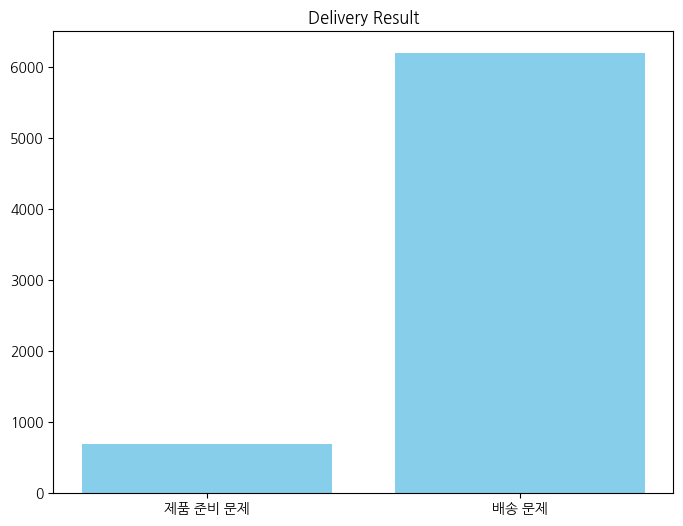

In [ ]:
# 배송 예측 실패 원인 비율 (제품 준비 문제 or 배송 문제)

x = ['제품 준비 문제', '배송 문제']
y = [prepare_problem, delivery_problem]
plt.figure(figsize=(8,6))
plt.bar(x, y, color='skyblue')


plt.title('Delivery Result')

plt.show()

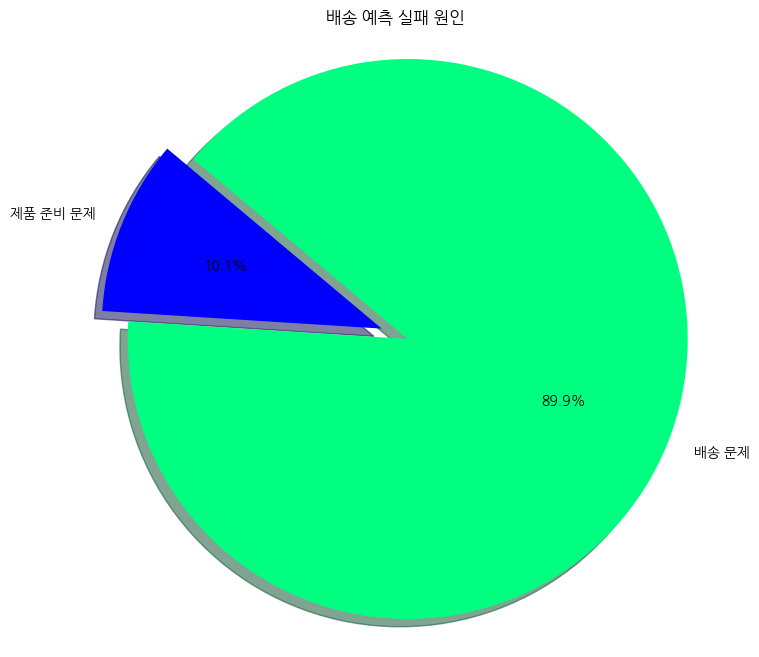

In [ ]:
# 파이 차트 생성
labels = ['제품 준비 문제', '배송 문제']
sizes = [prepare_problem, delivery_problem]
colors = plt.cm.winter(np.linspace(0, 1, 2))  # winter 컬러맵에서 두 가지 색상 추출
explode = (0.1, 0)  # Success 항목을 약간 분리

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('배송 예측 실패 원인')
plt.axis('equal')  # 파이 차트를 원형으로 그리기 위해 비율을 동일하게 설정
plt.show()

In [ ]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87934 entries, 0 to 87954
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   주문 고유 ID  87934 non-null  object         
 1   고객 ID     87934 non-null  object         
 2   주문 상태     87934 non-null  object         
 3   구매 시간     87934 non-null  datetime64[ns] 
 4   물류 처리 시간  87934 non-null  datetime64[ns] 
 5   실제 배송 날짜  87934 non-null  datetime64[ns] 
 6   기대 배송 날짜  87934 non-null  datetime64[ns] 
 7   제품 준비 기간  87934 non-null  timedelta64[ns]
 8   실제 배송 기간  87934 non-null  timedelta64[ns]
 9   예상 배송 기간  87934 non-null  timedelta64[ns]
 10  실제 수령 기간  87934 non-null  timedelta64[ns]
dtypes: datetime64[ns](4), object(3), timedelta64[ns](4)
memory usage: 8.1+ MB


## 실제 배송 기간 시각화

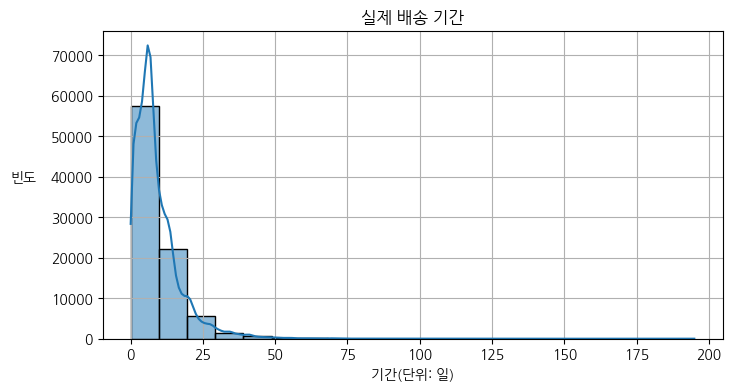

In [ ]:
# 실제 배송 기간 시각화
plt.figure(figsize=(8, 4))
sns.histplot(delivery['실제 배송 기간'].dt.days, kde=True, bins=20, edgecolor='black')
plt.title('실제 배송 기간')
plt.xlabel('기간(단위: 일)')
plt.ylabel('빈도', rotation=0, labelpad=20)
plt.grid(True)
plt.show()

## 시분초 단위 년월일 단위로 통합

In [ ]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87934 entries, 0 to 87954
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   주문 고유 ID  87934 non-null  object         
 1   고객 ID     87934 non-null  object         
 2   주문 상태     87934 non-null  object         
 3   구매 시간     87934 non-null  datetime64[ns] 
 4   물류 처리 시간  87934 non-null  datetime64[ns] 
 5   실제 배송 날짜  87934 non-null  datetime64[ns] 
 6   기대 배송 날짜  87934 non-null  datetime64[ns] 
 7   제품 준비 기간  87934 non-null  timedelta64[ns]
 8   실제 배송 기간  87934 non-null  timedelta64[ns]
 9   예상 배송 기간  87934 non-null  timedelta64[ns]
 10  실제 수령 기간  87934 non-null  timedelta64[ns]
dtypes: datetime64[ns](4), object(3), timedelta64[ns](4)
memory usage: 8.1+ MB


In [ ]:
# datetime64 컬럼들을 년-월-일 형식으로 변환
delivery['구매 시간'] = delivery['구매 시간'].dt.strftime('%Y-%m-%d')
delivery['물류 처리 시간'] = delivery['물류 처리 시간'].dt.strftime('%Y-%m-%d')
delivery['실제 배송 날짜'] = delivery['실제 배송 날짜'].dt.strftime('%Y-%m-%d')
delivery['기대 배송 날짜'] = delivery['기대 배송 날짜'].dt.strftime('%Y-%m-%d')

In [ ]:
# timedelta 컬럼들을 일 단위로 변환
delivery['제품 준비 기간'] = delivery['제품 준비 기간'].dt.days
delivery['실제 배송 기간'] = delivery['실제 배송 기간'].dt.days
delivery['예상 배송 기간'] = delivery['예상 배송 기간'].dt.days
delivery['실제 수령 기간'] = delivery['실제 수령 기간'].dt.days

In [ ]:
delivery

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,실제 수령 기간
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02,2018-10-04,2018-10-10,2018-10-18,2,6,15,8
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18,2018-11-22,2018-12-02,2018-12-15,3,9,26,13
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13,2019-02-14,2019-02-16,2019-02-26,0,1,12,2
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09,2018-07-11,2018-07-26,2018-08-01,1,14,22,16
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16,2018-05-22,2018-05-26,2018-06-07,5,4,21,9
...,...,...,...,...,...,...,...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09,2018-03-10,2018-03-17,2018-03-28,1,7,18,8
87951,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06,2019-02-07,2019-02-28,2019-03-02,1,20,23,22
87952,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27,2018-08-28,2018-09-21,2018-09-27,1,23,30,24
87953,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08,2019-01-12,2019-01-25,2019-02-15,3,13,37,17


# 고객, 판매자 경위도 병합 (customers + locations, sellers + locations)

## 고객, 판매자, 위치 데이터 확인

- locations_final에서 전처리 시
- locations = locations.groupby(by=['우편번호 앞부분', '도시', '주', '주 한국명', '지역'], as_index=False).median()을 통해 loctaions 데이터 중복값을 중앙값으로 대체함

In [ ]:
locations

,우편번호 앞부분,도시,주,주 한국명,지역,위도,경도
0,1001,sao paulo,SP,상파울루주,남동부,-23.549951,-46.634027
1,1002,sao paulo,SP,상파울루주,남동부,-23.548228,-46.635247
2,1003,sao paulo,SP,상파울루주,남동부,-23.548977,-46.635313
3,1004,sao paulo,SP,상파울루주,남동부,-23.549550,-46.634771
4,1005,sao paulo,SP,상파울루주,남동부,-23.549763,-46.636100
...,...,...,...,...,...,...,...
19604,99960,charrua,RS,히우그란지두술주,남부,-27.953797,-52.029641
19605,99965,agua santa,RS,히우그란지두술주,남부,-28.179542,-52.035551
19606,99970,ciriaco,RS,히우그란지두술주,남부,-28.343257,-51.875470
19607,99980,david canabarro,RS,히우그란지두술주,남부,-28.388342,-51.846871


In [ ]:
locations.columns

Index(['우편번호 앞부분', '도시', '주', '주 한국명', '지역', '위도', '경도'], dtype='object')

In [ ]:
locations['우편번호 앞부분'].value_counts()

우편번호 앞부분
17970    4
45936    4
65935    4
13454    4
89610    4
        ..
20203    1
20091    1
20090    1
20081    1
99990    1
Name: count, Length: 19007, dtype: int64

In [ ]:
locations[locations['우편번호 앞부분'] == 17970]

,우편번호 앞부분,도시,주,주 한국명,지역,위도,경도
6085,17970,sao joao do pau d alho,SP,상파울루주,남동부,-21.271582,-51.663565
6086,17970,sao joao do pau d%26apos%3balho,SP,상파울루주,남동부,-21.269165,-51.668758
6087,17970,sao joao do pau d'alho,SP,상파울루주,남동부,-21.270829,-51.665765
6088,17970,sao joao do pau dalho,SP,상파울루주,남동부,-21.269116,-51.667028


## 컬럼명 통일(판매자 따로 고객 따로)

In [ ]:
locations_cus = locations.copy()

locations_cus.rename(columns={'우편번호 앞부분': '고객 우편번호 앞부분'}, inplace=True)
locations_cus.rename(columns={'도시': '고객 도시'}, inplace=True)
locations_cus.rename(columns={'주': '고객 주'}, inplace=True)
locations_cus.rename(columns={'주 한국명': '고객 주 한국명'}, inplace=True)
locations_cus.rename(columns={'지역': '고객 지역'}, inplace=True)
locations_cus.rename(columns={'위도': '고객 위도'}, inplace=True)
locations_cus.rename(columns={'경도': '고객 경도'}, inplace=True)

locations_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19609 entries, 0 to 19608
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   고객 우편번호 앞부분  19609 non-null  int64  
 1   고객 도시        19609 non-null  object 
 2   고객 주         19609 non-null  object 
 3   고객 주 한국명     19609 non-null  object 
 4   고객 지역        19609 non-null  object 
 5   고객 위도        19609 non-null  float64
 6   고객 경도        19609 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.0+ MB


In [ ]:
locations_sel = locations.copy()

locations_sel.rename(columns={'우편번호 앞부분': '판매자 우편번호 앞부분'}, inplace=True)
locations_sel.rename(columns={'도시': '판매자 도시'}, inplace=True)
locations_sel.rename(columns={'주': '판매자 주'}, inplace=True)
locations_sel.rename(columns={'주 한국명': '판매자 주 한국명'}, inplace=True)
locations_sel.rename(columns={'지역': '판매자 지역'}, inplace=True)
locations_sel.rename(columns={'위도': '판매자 위도'}, inplace=True)
locations_sel.rename(columns={'경도': '판매자 경도'}, inplace=True)

locations_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19609 entries, 0 to 19608
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   판매자 우편번호 앞부분  19609 non-null  int64  
 1   판매자 도시        19609 non-null  object 
 2   판매자 주         19609 non-null  object 
 3   판매자 주 한국명     19609 non-null  object 
 4   판매자 지역        19609 non-null  object 
 5   판매자 위도        19609 non-null  float64
 6   판매자 경도        19609 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.0+ MB


In [ ]:
customers

,고객 ID,고객 고유 ID,우편번호 앞부분,도시,주,고객 도시,주 한국명,지역
0,CUSTOMER_00000,CUSTOMER_Unique_00000,14409,franca,SP,franca,상파울루주,남동부
1,CUSTOMER_00001,CUSTOMER_Unique_00001,9790,sao bernardo do campo,SP,sao bernardo do campo,상파울루주,남동부
2,CUSTOMER_00002,CUSTOMER_Unique_00002,1151,sao paulo,SP,sao paulo,상파울루주,남동부
3,CUSTOMER_00003,CUSTOMER_Unique_00003,8775,mogi das cruzes,SP,mogi das cruzes,상파울루주,남동부
4,CUSTOMER_00004,CUSTOMER_Unique_00004,89254,jaragua do sul,SC,jaragua do sul,산타카타리나주,남부
...,...,...,...,...,...,...,...,...
87950,CUSTOMER_88083,CUSTOMER_Unique_85234,3937,sao paulo,SP,sao paulo,상파울루주,남동부
87951,CUSTOMER_88084,CUSTOMER_Unique_85235,6764,taboao da serra,SP,taboao da serra,상파울루주,남동부
87952,CUSTOMER_88085,CUSTOMER_Unique_85236,60115,fortaleza,CE,fortaleza,세아라주,북동부
87953,CUSTOMER_88086,CUSTOMER_Unique_85237,92120,canoas,RS,canoas,히우그란지두술주,남부


In [ ]:
customers2 = customers.copy()

customers2.rename(columns={'우편번호 앞부분': '고객 우편번호 앞부분'}, inplace=True)
customers2.rename(columns={'주': '고객 주'}, inplace=True)
customers2.rename(columns={'주 한국명': '고객 주 한국명'}, inplace=True)
customers2.rename(columns={'지역': '고객 지역'}, inplace=True)
customers2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87955 entries, 0 to 87954
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   고객 ID        87955 non-null  object
 1   고객 고유 ID     87955 non-null  object
 2   고객 우편번호 앞부분  87955 non-null  int64 
 3   도시           87955 non-null  object
 4   고객 주         87955 non-null  object
 5   고객 도시        87955 non-null  object
 6   고객 주 한국명     87955 non-null  object
 7   고객 지역        87955 non-null  object
dtypes: int64(1), object(7)
memory usage: 5.4+ MB


In [ ]:
customers2

,고객 ID,고객 고유 ID,고객 우편번호 앞부분,도시,고객 주,고객 도시,고객 주 한국명,고객 지역
0,CUSTOMER_00000,CUSTOMER_Unique_00000,14409,franca,SP,franca,상파울루주,남동부
1,CUSTOMER_00001,CUSTOMER_Unique_00001,9790,sao bernardo do campo,SP,sao bernardo do campo,상파울루주,남동부
2,CUSTOMER_00002,CUSTOMER_Unique_00002,1151,sao paulo,SP,sao paulo,상파울루주,남동부
3,CUSTOMER_00003,CUSTOMER_Unique_00003,8775,mogi das cruzes,SP,mogi das cruzes,상파울루주,남동부
4,CUSTOMER_00004,CUSTOMER_Unique_00004,89254,jaragua do sul,SC,jaragua do sul,산타카타리나주,남부
...,...,...,...,...,...,...,...,...
87950,CUSTOMER_88083,CUSTOMER_Unique_85234,3937,sao paulo,SP,sao paulo,상파울루주,남동부
87951,CUSTOMER_88084,CUSTOMER_Unique_85235,6764,taboao da serra,SP,taboao da serra,상파울루주,남동부
87952,CUSTOMER_88085,CUSTOMER_Unique_85236,60115,fortaleza,CE,fortaleza,세아라주,북동부
87953,CUSTOMER_88086,CUSTOMER_Unique_85237,92120,canoas,RS,canoas,히우그란지두술주,남부


In [ ]:
sellers

,판매자 고유 ID,판매자 우편번호 앞자리,판매자 도시(city),판매자 주(state),주 한국명,지역
0,SELLER_0000,13023,campinas,SP,상파울루주,남동부
1,SELLER_0001,13844,mogi guacu,SP,상파울루주,남동부
2,SELLER_0002,12914,braganca paulista,SP,상파울루주,남동부
3,SELLER_0003,20920,rio de janeiro,RJ,리우데자네이루주,남동부
4,SELLER_0004,55325,brejao,PE,페르남부쿠주,북동부
...,...,...,...,...,...,...
2758,SELLER_2758,87111,sarandi,PR,파라나주,남부
2759,SELLER_2759,88137,palhoca,SC,산타카타리나주,남부
2760,SELLER_2760,4650,sao paulo,SP,상파울루주,남동부
2761,SELLER_2761,96080,pelotas,RS,히우그란지두술주,남부


In [ ]:
sellers.rename(columns={'판매자 우편번호 앞자리': '판매자 우편번호 앞부분'}, inplace=True)

In [ ]:
sellers2 = sellers.copy()

sellers2.rename(columns={'판매자 도시(city)': '판매자 도시'}, inplace=True)
sellers2.rename(columns={'판매자 주(state)': '판매자 주'}, inplace=True)
sellers2.rename(columns={'주 한국명': '판매자 주 한국명'}, inplace=True)
sellers2.rename(columns={'지역': '판매자 지역'}, inplace=True)
sellers2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   판매자 고유 ID     2763 non-null   object
 1   판매자 우편번호 앞부분  2763 non-null   int64 
 2   판매자 도시        2763 non-null   object
 3   판매자 주         2763 non-null   object
 4   판매자 주 한국명     2763 non-null   object
 5   판매자 지역        2763 non-null   object
dtypes: int64(1), object(5)
memory usage: 129.6+ KB


In [ ]:
sellers2

,판매자 고유 ID,판매자 우편번호 앞부분,판매자 도시,판매자 주,판매자 주 한국명,판매자 지역
0,SELLER_0000,13023,campinas,SP,상파울루주,남동부
1,SELLER_0001,13844,mogi guacu,SP,상파울루주,남동부
2,SELLER_0002,12914,braganca paulista,SP,상파울루주,남동부
3,SELLER_0003,20920,rio de janeiro,RJ,리우데자네이루주,남동부
4,SELLER_0004,55325,brejao,PE,페르남부쿠주,북동부
...,...,...,...,...,...,...
2758,SELLER_2758,87111,sarandi,PR,파라나주,남부
2759,SELLER_2759,88137,palhoca,SC,산타카타리나주,남부
2760,SELLER_2760,4650,sao paulo,SP,상파울루주,남동부
2761,SELLER_2761,96080,pelotas,RS,히우그란지두술주,남부


In [ ]:
customers2.columns, locations_cus.columns

(Index(['고객 ID', '고객 고유 ID', '고객 우편번호 앞부분', '도시', '고객 주', '고객 도시', '고객 주 한국명',
        '고객 지역'],
       dtype='object'),
 Index(['고객 우편번호 앞부분', '고객 도시', '고객 주', '고객 주 한국명', '고객 지역', '고객 위도', '고객 경도'], dtype='object'))

## 고객, 판매자 데이터와 위치를 각각 병합(우편번호 기준)

In [ ]:
customers3 = pd.merge(customers2, locations_cus, on=['고객 우편번호 앞부분', '고객 도시', '고객 주', '고객 주 한국명', '고객 지역'], how='left')
customers3

,고객 ID,고객 고유 ID,고객 우편번호 앞부분,도시,고객 주,고객 도시,고객 주 한국명,고객 지역,고객 위도,고객 경도
0,CUSTOMER_00000,CUSTOMER_Unique_00000,14409,franca,SP,franca,상파울루주,남동부,-20.502307,-47.396740
1,CUSTOMER_00001,CUSTOMER_Unique_00001,9790,sao bernardo do campo,SP,sao bernardo do campo,상파울루주,남동부,-23.730435,-46.541474
2,CUSTOMER_00002,CUSTOMER_Unique_00002,1151,sao paulo,SP,sao paulo,상파울루주,남동부,-23.531294,-46.656980
3,CUSTOMER_00003,CUSTOMER_Unique_00003,8775,mogi das cruzes,SP,mogi das cruzes,상파울루주,남동부,-23.499025,-46.183436
4,CUSTOMER_00004,CUSTOMER_Unique_00004,89254,jaragua do sul,SC,jaragua do sul,산타카타리나주,남부,-26.471054,-49.114024
...,...,...,...,...,...,...,...,...,...,...
87950,CUSTOMER_88083,CUSTOMER_Unique_85234,3937,sao paulo,SP,sao paulo,상파울루주,남동부,-23.586845,-46.499651
87951,CUSTOMER_88084,CUSTOMER_Unique_85235,6764,taboao da serra,SP,taboao da serra,상파울루주,남동부,-23.617326,-46.766974
87952,CUSTOMER_88085,CUSTOMER_Unique_85236,60115,fortaleza,CE,fortaleza,세아라주,북동부,-3.735988,-38.510484
87953,CUSTOMER_88086,CUSTOMER_Unique_85237,92120,canoas,RS,canoas,히우그란지두술주,남부,-29.949783,-51.169077


In [ ]:
customers3[customers3['고객 우편번호 앞부분'] == 17970]

,고객 ID,고객 고유 ID,고객 우편번호 앞부분,도시,고객 주,고객 도시,고객 주 한국명,고객 지역,고객 위도,고객 경도


In [ ]:
sellers2.columns, locations_sel.columns

(Index(['판매자 고유 ID', '판매자 우편번호 앞부분', '판매자 도시', '판매자 주', '판매자 주 한국명', '판매자 지역'], dtype='object'),
 Index(['판매자 우편번호 앞부분', '판매자 도시', '판매자 주', '판매자 주 한국명', '판매자 지역', '판매자 위도',
        '판매자 경도'],
       dtype='object'))

In [ ]:
sellers3 = pd.merge(sellers2, locations_sel, on=['판매자 우편번호 앞부분', '판매자 도시', '판매자 주', '판매자 주 한국명', '판매자 지역'], how='left')
sellers3

,판매자 고유 ID,판매자 우편번호 앞부분,판매자 도시,판매자 주,판매자 주 한국명,판매자 지역,판매자 위도,판매자 경도
0,SELLER_0000,13023,campinas,SP,상파울루주,남동부,-22.893863,-47.062006
1,SELLER_0001,13844,mogi guacu,SP,상파울루주,남동부,-22.382655,-46.948428
2,SELLER_0002,12914,braganca paulista,SP,상파울루주,남동부,-22.963763,-46.534676
3,SELLER_0003,20920,rio de janeiro,RJ,리우데자네이루주,남동부,-22.894908,-43.230806
4,SELLER_0004,55325,brejao,PE,페르남부쿠주,북동부,-9.024839,-36.570200
...,...,...,...,...,...,...,...,...
2758,SELLER_2758,87111,sarandi,PR,파라나주,남부,-23.448591,-51.869229
2759,SELLER_2759,88137,palhoca,SC,산타카타리나주,남부,-27.626905,-48.674389
2760,SELLER_2760,4650,sao paulo,SP,상파울루주,남동부,-23.657622,-46.677126
2761,SELLER_2761,96080,pelotas,RS,히우그란지두술주,남부,-31.751451,-52.323078


## 병합 후 결측치 처리(위도, 경도에서 발생)

- locations에 있는 우편번호가 고객이나 판매자 데이터에 있는 모든 우편번호를 가지고 있지 않다

In [ ]:
customers3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87955 entries, 0 to 87954
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   고객 ID        87955 non-null  object 
 1   고객 고유 ID     87955 non-null  object 
 2   고객 우편번호 앞부분  87955 non-null  int64  
 3   도시           87955 non-null  object 
 4   고객 주         87955 non-null  object 
 5   고객 도시        87955 non-null  object 
 6   고객 주 한국명     87955 non-null  object 
 7   고객 지역        87955 non-null  object 
 8   고객 위도        87684 non-null  float64
 9   고객 경도        87684 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 6.7+ MB


In [ ]:
# customers3 데이터프레임에서 각 열의 결측치 개수 확인
missing_customers = customers3.isnull().sum()
print("각 열의 결측치 개수:\n", missing_customers)

# 고객데이터는 경위도에서 결측치 271건 발생

각 열의 결측치 개수:
 고객 ID            0
고객 고유 ID         0
고객 우편번호 앞부분      0
도시               0
고객 주             0
고객 도시            0
고객 주 한국명         0
고객 지역            0
고객 위도          271
고객 경도          271
dtype: int64


In [ ]:
# sellers3 데이터프레임에서 각 열의 결측치 개수 확인
missing_sellers = sellers3.isnull().sum()
print("각 열의 결측치 개수:\n", missing_sellers)

# 판매자 데이터는 경위도에서 결측치 123건 발생

각 열의 결측치 개수:
 판매자 고유 ID         0
판매자 우편번호 앞부분      0
판매자 도시            0
판매자 주             0
판매자 주 한국명         0
판매자 지역            0
판매자 위도          123
판매자 경도          123
dtype: int64


## 경위도 결측치 제거

In [ ]:
# 결측치가 있는 행을 제거
customers3_cleaned = customers3.dropna()

# 결측치가 없는지 확인
missing_customers_cleaned = customers3_cleaned.isnull().sum()
print("각 열의 결측치 개수 (제거 후):\n", missing_customers_cleaned)

# 제거된 행의 개수 확인
removed_rows = len(customers3) - len(customers3_cleaned)
print(f"제거된 행의 개수: {removed_rows}")

각 열의 결측치 개수 (제거 후):
 고객 ID          0
고객 고유 ID       0
고객 우편번호 앞부분    0
도시             0
고객 주           0
고객 도시          0
고객 주 한국명       0
고객 지역          0
고객 위도          0
고객 경도          0
dtype: int64
제거된 행의 개수: 271


In [ ]:
# 결측치가 있는 행을 제거
sellers3_cleaned = sellers3.dropna()

# 결측치가 없는지 확인
missing_sellers_cleaned = sellers3_cleaned.isnull().sum()
print("각 열의 결측치 개수 (제거 후):\n", missing_sellers_cleaned)

# 제거된 행의 개수 확인
removed_rows_sellers = len(sellers3) - len(sellers3_cleaned)
print(f"제거된 행의 개수: {removed_rows_sellers}")

각 열의 결측치 개수 (제거 후):
 판매자 고유 ID       0
판매자 우편번호 앞부분    0
판매자 도시          0
판매자 주           0
판매자 주 한국명       0
판매자 지역          0
판매자 위도          0
판매자 경도          0
dtype: int64
제거된 행의 개수: 123


In [ ]:
customers3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87684 entries, 0 to 87954
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   고객 ID        87684 non-null  object 
 1   고객 고유 ID     87684 non-null  object 
 2   고객 우편번호 앞부분  87684 non-null  int64  
 3   도시           87684 non-null  object 
 4   고객 주         87684 non-null  object 
 5   고객 도시        87684 non-null  object 
 6   고객 주 한국명     87684 non-null  object 
 7   고객 지역        87684 non-null  object 
 8   고객 위도        87684 non-null  float64
 9   고객 경도        87684 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 7.4+ MB


In [ ]:
sellers3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, 0 to 2762
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   판매자 고유 ID     2640 non-null   object 
 1   판매자 우편번호 앞부분  2640 non-null   int64  
 2   판매자 도시        2640 non-null   object 
 3   판매자 주         2640 non-null   object 
 4   판매자 주 한국명     2640 non-null   object 
 5   판매자 지역        2640 non-null   object 
 6   판매자 위도        2640 non-null   float64
 7   판매자 경도        2640 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 185.6+ KB


In [ ]:
customers_locations = customers3_cleaned
sellers_locations = sellers3_cleaned

# tmp : delivery + customers_locations

In [ ]:
delivery.columns, customers_locations.columns, sellers_locations.columns

(Index(['주문 고유 ID', '고객 ID', '주문 상태', '구매 시간', '물류 처리 시간', '실제 배송 날짜',
        '기대 배송 날짜', '제품 준비 기간', '실제 배송 기간', '예상 배송 기간', '실제 수령 기간'],
       dtype='object'),
 Index(['고객 ID', '고객 고유 ID', '고객 우편번호 앞부분', '도시', '고객 주', '고객 도시', '고객 주 한국명',
        '고객 지역', '고객 위도', '고객 경도'],
       dtype='object'),
 Index(['판매자 고유 ID', '판매자 우편번호 앞부분', '판매자 도시', '판매자 주', '판매자 주 한국명', '판매자 지역',
        '판매자 위도', '판매자 경도'],
       dtype='object'))

In [ ]:
delivery

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,실제 수령 기간
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02,2018-10-04,2018-10-10,2018-10-18,2,6,15,8
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18,2018-11-22,2018-12-02,2018-12-15,3,9,26,13
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13,2019-02-14,2019-02-16,2019-02-26,0,1,12,2
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09,2018-07-11,2018-07-26,2018-08-01,1,14,22,16
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16,2018-05-22,2018-05-26,2018-06-07,5,4,21,9
...,...,...,...,...,...,...,...,...,...,...,...
87950,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09,2018-03-10,2018-03-17,2018-03-28,1,7,18,8
87951,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06,2019-02-07,2019-02-28,2019-03-02,1,20,23,22
87952,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27,2018-08-28,2018-09-21,2018-09-27,1,23,30,24
87953,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08,2019-01-12,2019-01-25,2019-02-15,3,13,37,17


In [ ]:
customers_locations

,고객 ID,고객 고유 ID,고객 우편번호 앞부분,도시,고객 주,고객 도시,고객 주 한국명,고객 지역,고객 위도,고객 경도
0,CUSTOMER_00000,CUSTOMER_Unique_00000,14409,franca,SP,franca,상파울루주,남동부,-20.502307,-47.396740
1,CUSTOMER_00001,CUSTOMER_Unique_00001,9790,sao bernardo do campo,SP,sao bernardo do campo,상파울루주,남동부,-23.730435,-46.541474
2,CUSTOMER_00002,CUSTOMER_Unique_00002,1151,sao paulo,SP,sao paulo,상파울루주,남동부,-23.531294,-46.656980
3,CUSTOMER_00003,CUSTOMER_Unique_00003,8775,mogi das cruzes,SP,mogi das cruzes,상파울루주,남동부,-23.499025,-46.183436
4,CUSTOMER_00004,CUSTOMER_Unique_00004,89254,jaragua do sul,SC,jaragua do sul,산타카타리나주,남부,-26.471054,-49.114024
...,...,...,...,...,...,...,...,...,...,...
87950,CUSTOMER_88083,CUSTOMER_Unique_85234,3937,sao paulo,SP,sao paulo,상파울루주,남동부,-23.586845,-46.499651
87951,CUSTOMER_88084,CUSTOMER_Unique_85235,6764,taboao da serra,SP,taboao da serra,상파울루주,남동부,-23.617326,-46.766974
87952,CUSTOMER_88085,CUSTOMER_Unique_85236,60115,fortaleza,CE,fortaleza,세아라주,북동부,-3.735988,-38.510484
87953,CUSTOMER_88086,CUSTOMER_Unique_85237,92120,canoas,RS,canoas,히우그란지두술주,남부,-29.949783,-51.169077


In [ ]:
customers_locations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87684 entries, 0 to 87954
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   고객 ID        87684 non-null  object 
 1   고객 고유 ID     87684 non-null  object 
 2   고객 우편번호 앞부분  87684 non-null  int64  
 3   도시           87684 non-null  object 
 4   고객 주         87684 non-null  object 
 5   고객 도시        87684 non-null  object 
 6   고객 주 한국명     87684 non-null  object 
 7   고객 지역        87684 non-null  object 
 8   고객 위도        87684 non-null  float64
 9   고객 경도        87684 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 7.4+ MB


In [ ]:
# delivery + customers_locations
tmp = pd.merge(delivery, customers_locations, on='고객 ID', how='left')
tmp.shape

(87934, 20)

In [ ]:
tmp

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,실제 수령 기간,고객 고유 ID,고객 우편번호 앞부분,도시,고객 주,고객 도시,고객 주 한국명,고객 지역,고객 위도,고객 경도
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02,2018-10-04,2018-10-10,2018-10-18,2,6,15,8,CUSTOMER_Unique_60785,3149.0,sao paulo,SP,sao paulo,상파울루주,남동부,-23.575816,-46.587303
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18,2018-11-22,2018-12-02,2018-12-15,3,9,26,13,CUSTOMER_Unique_52983,59296.0,sao goncalo do amarante,RN,sao goncalo do amarante,히우그란지두노르치주,북동부,-5.773971,-35.273838
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13,2019-02-14,2019-02-16,2019-02-26,0,1,12,2,CUSTOMER_Unique_58227,9195.0,santo andre,SP,santo andre,상파울루주,남동부,-23.675471,-46.514788
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09,2018-07-11,2018-07-26,2018-08-01,1,14,22,16,CUSTOMER_Unique_59164,86320.0,congonhinhas,PR,congonhinhas,파라나주,남부,-23.551117,-50.551613
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16,2018-05-22,2018-05-26,2018-06-07,5,4,21,9,CUSTOMER_Unique_74753,26525.0,nilopolis,RJ,nilopolis,리우데자네이루주,남동부,-22.805728,-43.423190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87929,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09,2018-03-10,2018-03-17,2018-03-28,1,7,18,8,CUSTOMER_Unique_52545,12209.0,sao jose dos campos,SP,sao jose dos campos,상파울루주,남동부,-23.177048,-45.884506
87930,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06,2019-02-07,2019-02-28,2019-03-02,1,20,23,22,CUSTOMER_Unique_67637,11722.0,praia grande,SP,praia grande,상파울루주,남동부,-24.001467,-46.449577
87931,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27,2018-08-28,2018-09-21,2018-09-27,1,23,30,24,CUSTOMER_Unique_17508,45920.0,nova vicosa,BA,nova vicosa,바이아주,북동부,-17.897354,-39.372100
87932,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08,2019-01-12,2019-01-25,2019-02-15,3,13,37,17,CUSTOMER_Unique_14906,28685.0,japuiba,RJ,japuiba,리우데자네이루주,남동부,-22.561964,-42.690111


In [ ]:
# 공백값을 가지고 있는 행을 찾고 출력
rows_with_missing = tmp[tmp.isnull().any(axis=1)]
print("공백값을 가지고 있는 행:")
print(rows_with_missing)

공백값을 가지고 있는 행:
          주문 고유 ID           고객 ID      주문 상태       구매 시간    물류 처리 시간  \
388    ORDER_00388  CUSTOMER_49404  delivered  2019-03-16  2019-03-19   
536    ORDER_00536  CUSTOMER_29607  delivered  2018-10-28  2018-11-06   
601    ORDER_00601  CUSTOMER_59714  delivered  2018-05-14  2018-05-16   
821    ORDER_00821  CUSTOMER_54421  delivered  2019-07-22  2019-07-23   
973    ORDER_00973  CUSTOMER_00768  delivered  2019-05-08  2019-05-10   
...            ...             ...        ...         ...         ...   
85378  ORDER_85524  CUSTOMER_70440  delivered  2019-05-23  2019-06-20   
86607  ORDER_86755  CUSTOMER_01914  delivered  2019-04-03  2019-04-04   
87441  ORDER_87594  CUSTOMER_60729  delivered  2018-12-04  2018-12-06   
87600  ORDER_87753  CUSTOMER_01837  delivered  2018-06-16  2018-06-20   
87686  ORDER_87839  CUSTOMER_15173  delivered  2018-03-05  2018-03-06   

         실제 배송 날짜    기대 배송 날짜  제품 준비 기간  실제 배송 기간  예상 배송 기간  실제 수령 기간  \
388    2019-05-14  2019-04-11      

In [ ]:
# 브라질 범위에 없는 고객이라 경위도 데이터가 사라진 고객임
rows_with_missing

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,실제 수령 기간,고객 고유 ID,고객 우편번호 앞부분,도시,고객 주,고객 도시,고객 주 한국명,고객 지역,고객 위도,고객 경도
388,ORDER_00388,CUSTOMER_49404,delivered,2019-03-16,2019-03-19,2019-05-14,2019-04-11,3,55,25,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536,ORDER_00536,CUSTOMER_29607,delivered,2018-10-28,2018-11-06,2018-11-13,2018-11-22,8,7,24,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,ORDER_00601,CUSTOMER_59714,delivered,2018-05-14,2018-05-16,2018-05-23,2018-06-02,2,6,18,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,ORDER_00821,CUSTOMER_54421,delivered,2019-07-22,2019-07-23,2019-07-26,2019-08-15,0,3,23,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
973,ORDER_00973,CUSTOMER_00768,delivered,2019-05-08,2019-05-10,2019-05-21,2019-06-05,1,10,27,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85378,ORDER_85524,CUSTOMER_70440,delivered,2019-05-23,2019-06-20,2019-07-17,2019-07-11,28,27,48,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86607,ORDER_86755,CUSTOMER_01914,delivered,2019-04-03,2019-04-04,2019-05-07,2019-04-20,1,33,16,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87441,ORDER_87594,CUSTOMER_60729,delivered,2018-12-04,2018-12-06,2018-12-19,2019-01-02,1,12,28,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87600,ORDER_87753,CUSTOMER_01837,delivered,2018-06-16,2018-06-20,2018-07-03,2018-07-13,3,12,26,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 공백값을 가지고 있는 행을 제거
tmp_cleaned = tmp.dropna()

In [ ]:
tmp_cleaned.shape

(87663, 20)

In [ ]:
tmp = tmp_cleaned

# review 확인

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87873 entries, 0 to 87872
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   리뷰 고유 ID  87873 non-null  object
 1   주문 고유 ID  87873 non-null  object
 2   리뷰 점수     87873 non-null  int64 
 3   리뷰 생성 시간  87873 non-null  object
 4   리뷰 답변 시간  87873 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [ ]:
reviews['리뷰 생성 시간'] = pd.to_datetime(reviews['리뷰 생성 시간']).astype('datetime64[ns]')
reviews['리뷰 답변 시간'] = pd.to_datetime(reviews['리뷰 답변 시간']).astype('datetime64[ns]')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87873 entries, 0 to 87872
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   리뷰 고유 ID  87873 non-null  object        
 1   주문 고유 ID  87873 non-null  object        
 2   리뷰 점수     87873 non-null  int64         
 3   리뷰 생성 시간  87873 non-null  datetime64[ns]
 4   리뷰 답변 시간  87873 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.4+ MB


In [ ]:
reviews['리뷰 응답 기간'] = reviews['리뷰 답변 시간'] - reviews['리뷰 생성 시간']
reviews.head()

,리뷰 고유 ID,주문 고유 ID,리뷰 점수,리뷰 생성 시간,리뷰 답변 시간,리뷰 응답 기간
0,REVIEW_00000,ORDER_01674,4,2019-01-18,2019-01-18,0 days
1,REVIEW_00001,ORDER_80140,5,2019-03-10,2019-03-11,1 days
2,REVIEW_00002,ORDER_69816,5,2019-02-17,2019-02-18,1 days
3,REVIEW_00003,ORDER_24398,5,2018-04-21,2018-04-21,0 days
4,REVIEW_00004,ORDER_70366,5,2019-03-01,2019-03-02,1 days


# 데이터 병합

## tmp2 : tmp + review

In [ ]:
tmp.shape, reviews.shape

((87663, 20), (87873, 6))

In [ ]:
# delivery + review
tmp2 = pd.merge(tmp, reviews, on='주문 고유 ID', how='left')
tmp2.shape

(88180, 25)

In [ ]:
tmp2['주문 고유 ID'].value_counts()

주문 고유 ID
ORDER_10934    3
ORDER_32889    3
ORDER_29361    3
ORDER_56061    3
ORDER_59109    2
              ..
ORDER_29445    1
ORDER_29444    1
ORDER_29443    1
ORDER_29442    1
ORDER_88087    1
Name: count, Length: 87663, dtype: int64

In [ ]:
order_counts = tmp2['주문 고유 ID'].value_counts()
ids_to_keep = order_counts[order_counts == 3].index
filtered_tmp = tmp2[tmp2['주문 고유 ID'].isin(ids_to_keep)]

filtered_tmp

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,...,고객 도시,고객 주 한국명,고객 지역,고객 위도,고객 경도,리뷰 고유 ID,리뷰 점수,리뷰 생성 시간,리뷰 답변 시간,리뷰 응답 기간
10944,ORDER_10934,CUSTOMER_15650,delivered,2019-02-25,2019-02-26,2019-03-19,2019-04-02,1,20,35,...,rio de janeiro,리우데자네이루주,남동부,-22.839208,-43.403962,REVIEW_07370,3.0,2019-03-20,2019-03-21,1 days
10945,ORDER_10934,CUSTOMER_15650,delivered,2019-02-25,2019-02-26,2019-03-19,2019-04-02,1,20,35,...,rio de janeiro,리우데자네이루주,남동부,-22.839208,-43.403962,REVIEW_10315,4.0,2019-03-29,2019-03-30,1 days
10946,ORDER_10934,CUSTOMER_15650,delivered,2019-02-25,2019-02-26,2019-03-19,2019-04-02,1,20,35,...,rio de janeiro,리우데자네이루주,남동부,-22.839208,-43.403962,REVIEW_61206,3.0,2019-03-06,2019-03-06,0 days
29367,ORDER_29361,CUSTOMER_57921,delivered,2018-01-26,2018-01-31,2018-02-06,2018-03-23,5,5,55,...,canoas,히우그란지두술주,남부,-29.898945,-51.163812,REVIEW_02630,5.0,2018-02-08,2018-02-14,6 days
29368,ORDER_29361,CUSTOMER_57921,delivered,2018-01-26,2018-01-31,2018-02-06,2018-03-23,5,5,55,...,canoas,히우그란지두술주,남부,-29.898945,-51.163812,REVIEW_03959,5.0,2018-02-07,2018-02-10,3 days
29369,ORDER_29361,CUSTOMER_57921,delivered,2018-01-26,2018-01-31,2018-02-06,2018-03-23,5,5,55,...,canoas,히우그란지두술주,남부,-29.898945,-51.163812,REVIEW_55332,5.0,2018-02-09,2018-02-09,0 days
32902,ORDER_32889,CUSTOMER_11807,delivered,2018-07-17,2018-07-20,2018-07-21,2018-08-01,2,1,14,...,sao bernardo do campo,상파울루주,남동부,-23.670003,-46.590638,REVIEW_01773,3.0,2018-07-22,2018-07-26,4 days
32903,ORDER_32889,CUSTOMER_11807,delivered,2018-07-17,2018-07-20,2018-07-21,2018-08-01,2,1,14,...,sao bernardo do campo,상파울루주,남동부,-23.670003,-46.590638,REVIEW_13808,5.0,2018-07-22,2018-07-26,4 days
32904,ORDER_32889,CUSTOMER_11807,delivered,2018-07-17,2018-07-20,2018-07-21,2018-08-01,2,1,14,...,sao bernardo do campo,상파울루주,남동부,-23.670003,-46.590638,REVIEW_08331,5.0,2018-07-21,2018-07-26,5 days
56101,ORDER_56061,CUSTOMER_01003,delivered,2019-03-31,2019-04-03,2019-04-06,2019-05-04,3,3,33,...,belo horizonte,미나스제라이스주,남동부,-19.919090,-43.881392,REVIEW_39489,1.0,2019-04-07,2019-04-08,1 days


### 실제 배송 기간 별 만족도(리뷰 점수)

In [ ]:
# 기간 int 변환 후
delivery_review = tmp2.copy()
# 상관관계 계산
correlation_days = delivery_review['리뷰 점수'].corr(delivery_review['실제 배송 기간'])

print("리뷰 점수와 실제 배송 기간 간의 상관관계:", correlation_days)

리뷰 점수와 실제 배송 기간 간의 상관관계: -0.3084376390315973


In [ ]:
delivery_review.shape

(88180, 25)

In [ ]:
# 공백값을 가지고 있는 행을 제거
delivery_review_cleaned = delivery_review.dropna()

In [ ]:
delivery_review_cleaned.shape

(87575, 25)

In [ ]:
correlation_days_cleaned = delivery_review_cleaned['리뷰 점수'].corr(delivery_review_cleaned['실제 배송 기간'])

print("리뷰 점수와 실제 배송 기간 간의 상관관계:", correlation_days_cleaned)

리뷰 점수와 실제 배송 기간 간의 상관관계: -0.3084376390315973


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


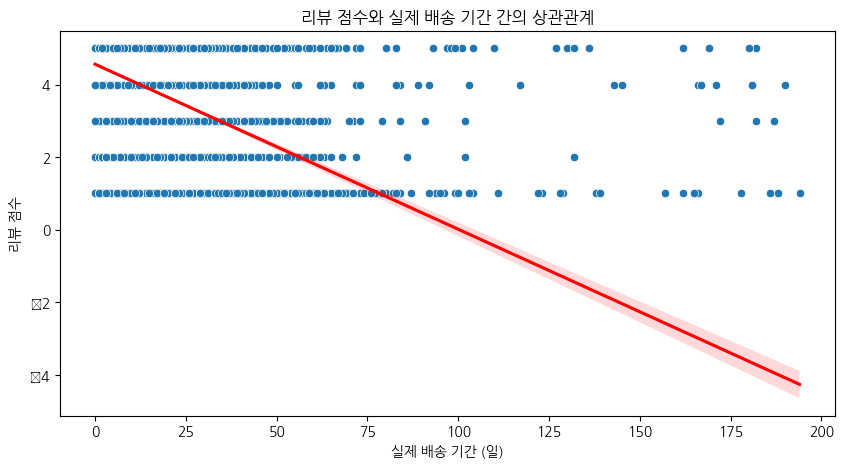

In [ ]:
# 산점도와 회귀선 그리기
plt.figure(figsize=(10, 5))
sns.scatterplot(x='실제 배송 기간', y='리뷰 점수', data=delivery_review_cleaned)
sns.regplot(x='실제 배송 기간', y='리뷰 점수', data = delivery_review_cleaned, scatter=False, color='red')
plt.title('리뷰 점수와 실제 배송 기간 간의 상관관계')
plt.xlabel('실제 배송 기간 (일)')
plt.ylabel('리뷰 점수')
plt.show()

# 배송 기간 길수록 리뷰 점수가 떨어지는 경향이 있으나,,큰 상관관계는 없는 것 같음

### 중복되는 주문 고유 ID 평균 리뷰 점수로 대체 및 1개로 통일

In [ ]:
# '주문 고유 ID'별 평균 리뷰 점수 계산
tmp2['평균 리뷰 점수'] = tmp2.groupby('주문 고유 ID')['리뷰 점수'].transform('mean')

# '리뷰 점수'를 '평균 리뷰 점수'로 대체
tmp2['리뷰 점수'] = tmp2['평균 리뷰 점수']

# '평균 리뷰 점수' 열 삭제
tmp2.drop(columns=['평균 리뷰 점수'], inplace=True)

# 결과 출력
print("평균 리뷰 점수로 대체 후 DataFrame:")
print(tmp2)

평균 리뷰 점수로 대체 후 DataFrame:
          주문 고유 ID           고객 ID      주문 상태       구매 시간    물류 처리 시간  \
0      ORDER_00000  CUSTOMER_62232  delivered  2018-10-02  2018-10-04   
1      ORDER_00001  CUSTOMER_54059  delivered  2018-11-18  2018-11-22   
2      ORDER_00002  CUSTOMER_59535  delivered  2019-02-13  2019-02-14   
3      ORDER_00003  CUSTOMER_60516  delivered  2018-07-09  2018-07-11   
4      ORDER_00004  CUSTOMER_76957  delivered  2018-05-16  2018-05-22   
...            ...             ...        ...         ...         ...   
88175  ORDER_88083  CUSTOMER_53611  delivered  2018-03-09  2018-03-10   
88176  ORDER_88084  CUSTOMER_69438  delivered  2019-02-06  2019-02-07   
88177  ORDER_88085  CUSTOMER_17637  delivered  2018-08-27  2018-08-28   
88178  ORDER_88086  CUSTOMER_15001  delivered  2019-01-08  2019-01-12   
88179  ORDER_88087  CUSTOMER_33732  delivered  2019-03-08  2019-03-09   

         실제 배송 날짜    기대 배송 날짜  제품 준비 기간  실제 배송 기간  예상 배송 기간  ...  \
0      2018-10-10  2018-10-18

In [ ]:
order_counts = tmp2['주문 고유 ID'].value_counts()
ids_to_keep = order_counts[order_counts == 3].index
filtered_tmp = tmp2[tmp2['주문 고유 ID'].isin(ids_to_keep)]

filtered_tmp

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,...,고객 도시,고객 주 한국명,고객 지역,고객 위도,고객 경도,리뷰 고유 ID,리뷰 점수,리뷰 생성 시간,리뷰 답변 시간,리뷰 응답 기간
10944,ORDER_10934,CUSTOMER_15650,delivered,2019-02-25,2019-02-26,2019-03-19,2019-04-02,1,20,35,...,rio de janeiro,리우데자네이루주,남동부,-22.839208,-43.403962,REVIEW_07370,3.333333,2019-03-20,2019-03-21,1 days
10945,ORDER_10934,CUSTOMER_15650,delivered,2019-02-25,2019-02-26,2019-03-19,2019-04-02,1,20,35,...,rio de janeiro,리우데자네이루주,남동부,-22.839208,-43.403962,REVIEW_10315,3.333333,2019-03-29,2019-03-30,1 days
10946,ORDER_10934,CUSTOMER_15650,delivered,2019-02-25,2019-02-26,2019-03-19,2019-04-02,1,20,35,...,rio de janeiro,리우데자네이루주,남동부,-22.839208,-43.403962,REVIEW_61206,3.333333,2019-03-06,2019-03-06,0 days
29367,ORDER_29361,CUSTOMER_57921,delivered,2018-01-26,2018-01-31,2018-02-06,2018-03-23,5,5,55,...,canoas,히우그란지두술주,남부,-29.898945,-51.163812,REVIEW_02630,5.000000,2018-02-08,2018-02-14,6 days
29368,ORDER_29361,CUSTOMER_57921,delivered,2018-01-26,2018-01-31,2018-02-06,2018-03-23,5,5,55,...,canoas,히우그란지두술주,남부,-29.898945,-51.163812,REVIEW_03959,5.000000,2018-02-07,2018-02-10,3 days
29369,ORDER_29361,CUSTOMER_57921,delivered,2018-01-26,2018-01-31,2018-02-06,2018-03-23,5,5,55,...,canoas,히우그란지두술주,남부,-29.898945,-51.163812,REVIEW_55332,5.000000,2018-02-09,2018-02-09,0 days
32902,ORDER_32889,CUSTOMER_11807,delivered,2018-07-17,2018-07-20,2018-07-21,2018-08-01,2,1,14,...,sao bernardo do campo,상파울루주,남동부,-23.670003,-46.590638,REVIEW_01773,4.333333,2018-07-22,2018-07-26,4 days
32903,ORDER_32889,CUSTOMER_11807,delivered,2018-07-17,2018-07-20,2018-07-21,2018-08-01,2,1,14,...,sao bernardo do campo,상파울루주,남동부,-23.670003,-46.590638,REVIEW_13808,4.333333,2018-07-22,2018-07-26,4 days
32904,ORDER_32889,CUSTOMER_11807,delivered,2018-07-17,2018-07-20,2018-07-21,2018-08-01,2,1,14,...,sao bernardo do campo,상파울루주,남동부,-23.670003,-46.590638,REVIEW_08331,4.333333,2018-07-21,2018-07-26,5 days
56101,ORDER_56061,CUSTOMER_01003,delivered,2019-03-31,2019-04-03,2019-04-06,2019-05-04,3,3,33,...,belo horizonte,미나스제라이스주,남동부,-19.919090,-43.881392,REVIEW_39489,1.000000,2019-04-07,2019-04-08,1 days


In [ ]:
# '주문 고유 ID' 중복 제거
tmp2_unique = tmp2.drop_duplicates(subset='주문 고유 ID')

# 결과 출력
print("중복 제거 후 DataFrame의 크기:", tmp2_unique.shape)
tmp2_unique

중복 제거 후 DataFrame의 크기: (87663, 25)


,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,...,고객 도시,고객 주 한국명,고객 지역,고객 위도,고객 경도,리뷰 고유 ID,리뷰 점수,리뷰 생성 시간,리뷰 답변 시간,리뷰 응답 기간
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02,2018-10-04,2018-10-10,2018-10-18,2,6,15,...,sao paulo,상파울루주,남동부,-23.575816,-46.587303,REVIEW_29035,4.0,2018-10-11,2018-10-12,1 days
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18,2018-11-22,2018-12-02,2018-12-15,3,9,26,...,sao goncalo do amarante,히우그란지두노르치주,북동부,-5.773971,-35.273838,REVIEW_68285,5.0,2018-12-03,2018-12-05,2 days
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13,2019-02-14,2019-02-16,2019-02-26,0,1,12,...,santo andre,상파울루주,남동부,-23.675471,-46.514788,REVIEW_47810,5.0,2019-02-17,2019-02-18,1 days
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09,2018-07-11,2018-07-26,2018-08-01,1,14,22,...,congonhinhas,파라나주,남부,-23.551117,-50.551613,REVIEW_83209,4.0,2018-07-27,2018-07-27,0 days
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16,2018-05-22,2018-05-26,2018-06-07,5,4,21,...,nilopolis,리우데자네이루주,남동부,-22.805728,-43.423190,REVIEW_29577,5.0,2018-05-27,2018-05-28,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88175,ORDER_88083,CUSTOMER_53611,delivered,2018-03-09,2018-03-10,2018-03-17,2018-03-28,1,7,18,...,sao jose dos campos,상파울루주,남동부,-23.177048,-45.884506,REVIEW_43007,5.0,2018-03-22,2018-03-23,1 days
88176,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06,2019-02-07,2019-02-28,2019-03-02,1,20,23,...,praia grande,상파울루주,남동부,-24.001467,-46.449577,REVIEW_49150,4.0,2019-03-01,2019-03-02,1 days
88177,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27,2018-08-28,2018-09-21,2018-09-27,1,23,30,...,nova vicosa,바이아주,북동부,-17.897354,-39.372100,REVIEW_38753,5.0,2018-09-22,2018-09-22,0 days
88178,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08,2019-01-12,2019-01-25,2019-02-15,3,13,37,...,japuiba,리우데자네이루주,남동부,-22.561964,-42.690111,REVIEW_06056,2.0,2019-01-26,2019-01-27,1 days


In [ ]:
tmp2_unique[tmp2_unique['주문 고유 ID'] == 'ORDER_10934']

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,...,고객 도시,고객 주 한국명,고객 지역,고객 위도,고객 경도,리뷰 고유 ID,리뷰 점수,리뷰 생성 시간,리뷰 답변 시간,리뷰 응답 기간
10944,ORDER_10934,CUSTOMER_15650,delivered,2019-02-25,2019-02-26,2019-03-19,2019-04-02,1,20,35,...,rio de janeiro,리우데자네이루주,남동부,-22.839208,-43.403962,REVIEW_07370,3.333333,2019-03-20,2019-03-21,1 days


In [ ]:
tmp2_unique.shape

(87663, 25)

In [ ]:
# tmp로 다시 대체
tmp2 = tmp2_unique

In [ ]:
tmp2.shape

(87663, 25)

## 고객(수령자) 지역 기준

### 주별 평균 배송 기간

In [ ]:
tmp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87663 entries, 0 to 88179
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   주문 고유 ID     87663 non-null  object         
 1   고객 ID        87663 non-null  object         
 2   주문 상태        87663 non-null  object         
 3   구매 시간        87663 non-null  object         
 4   물류 처리 시간     87663 non-null  object         
 5   실제 배송 날짜     87663 non-null  object         
 6   기대 배송 날짜     87663 non-null  object         
 7   제품 준비 기간     87663 non-null  int64          
 8   실제 배송 기간     87663 non-null  int64          
 9   예상 배송 기간     87663 non-null  int64          
 10  실제 수령 기간     87663 non-null  int64          
 11  고객 고유 ID     87663 non-null  object         
 12  고객 우편번호 앞부분  87663 non-null  float64        
 13  도시           87663 non-null  object         
 14  고객 주         87663 non-null  object         
 15  고객 도시        87663 non-null  object      

In [ ]:
# '주 한국명' 별 평균 배송 기간 계산
avg_delivery_time_by_state = tmp2.groupby('고객 주 한국명')['실제 배송 기간'].mean()

# 결과 출력
print("주 한국명 별 평균 배송 기간:")
avg_delivery_time_by_state

주 한국명 별 평균 배송 기간:


고객 주 한국명
고이아스주         12.268306
리우데자네이루주      12.009960
마라냥주          17.940184
마투그로수두술       12.223622
마투그로수주        14.849265
미나스제라이스주       8.587419
바이아주          15.975908
산타카타리나주       11.535061
상파울루주          5.305892
세르지피주         18.494881
세아라주          18.000000
아마조나스주        23.952000
아마파주          23.474576
아크리주          17.780822
알라고아스주        21.044077
연방구            9.621888
이스피리투산투주      12.111536
토칸칭스주         14.219512
파라나주           8.548387
파라이바주         17.040860
파라주           20.553633
페르남부쿠주        15.044890
피아우이주         16.298611
호라이마주         25.447368
혼도니아주         16.431718
히우그란지두노르치주    15.716247
히우그란지두술주      11.954731
Name: 실제 배송 기간, dtype: float64

### 지역별 평균 배송 기간

In [ ]:
# '지역' 별 평균 배송 기간 계산
avg_delivery_time_by_region = tmp2.groupby('고객 지역')['실제 배송 기간'].mean()

# 결과 출력
print("\n지역 별 평균 배송 기간:")
print(avg_delivery_time_by_region)


지역 별 평균 배송 기간:
고객 지역
남동부     7.346842
남부     10.638536
북동부    16.636839
북부     19.383486
중서부    11.766459
Name: 실제 배송 기간, dtype: float64


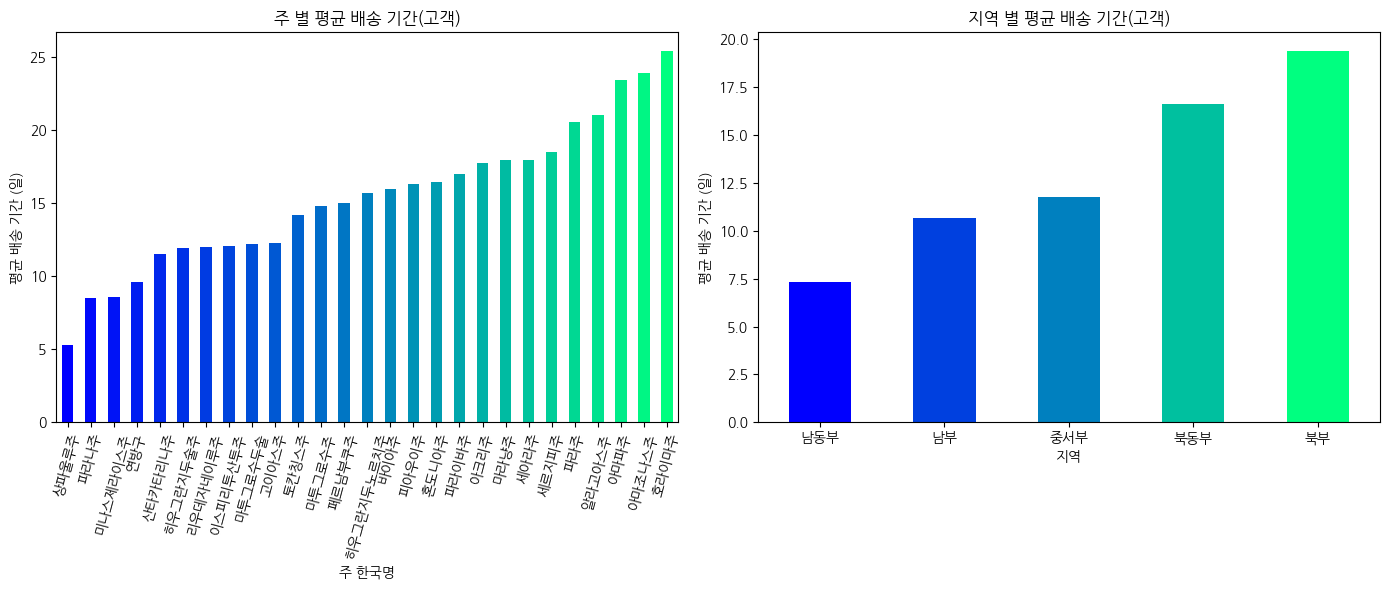

In [ ]:
# '주 한국명' 별 평균 배송 기간 계산
avg_delivery_time_by_state = tmp2.groupby('고객 주 한국명')['실제 배송 기간'].mean()

# '지역' 별 평균 배송 기간 계산
avg_delivery_time_by_region = tmp2.groupby('고객 지역')['실제 배송 기간'].mean()

# 그래프 시각화
plt.figure(figsize=(14, 6))

# '주 한국명' 별 평균 배송 기간 그래프
plt.subplot(1, 2, 1)
state_colors = plt.cm.winter(np.linspace(0, 1, len(avg_delivery_time_by_state)))
avg_delivery_time_by_state.sort_values().plot(kind='bar', color=state_colors)
plt.title('주 별 평균 배송 기간(고객)')
plt.xlabel('주 한국명')
plt.ylabel('평균 배송 기간 (일)')
plt.xticks(rotation=75)

# '지역' 별 평균 배송 기간 그래프
plt.subplot(1, 2, 2)
region_colors = plt.cm.winter(np.linspace(0, 1, len(avg_delivery_time_by_region)))
avg_delivery_time_by_region.sort_values().plot(kind='bar', color=region_colors)
plt.title('지역 별 평균 배송 기간(고객)')
plt.xlabel('지역')
plt.ylabel('평균 배송 기간 (일)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


- 확실히 아마존(밀림)지역이 교통이 불편하기 때문에 북부가 제일 배송 기간 오래 걸림
- 대도시 밀집한 남동부, 남부가 평균 배송 기간이 제일 짧았고, 그 중에서도 인구 가장 많고(4600만명) 경제력 강한 도시인 상파울루가 위치한 상파울루 주가 제일 짧은 기간을 보여줌  

## tmp3: tmp2(delivery + review) + order_items -> 제품 품목 연결용

In [ ]:
tmp2.shape, order_items.shape

((87663, 25), (100557, 6))

In [ ]:
# tmp2 + order_items
tmp3 = pd.merge(tmp2, order_items, on='주문 고유 ID', how='left')
tmp3.shape

(100234, 30)

In [ ]:
tmp3

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,...,리뷰 고유 ID,리뷰 점수,리뷰 생성 시간,리뷰 답변 시간,리뷰 응답 기간,주문 품목 수,제품 고유 ID,판매자 고유 ID,판매 가격,품목 화물 가격
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02,2018-10-04,2018-10-10,2018-10-18,2,6,15,...,REVIEW_29035,4.0,2018-10-11,2018-10-12,1 days,1.0,PRODUCT_02093,SELLER_0491,29.99,8.72
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18,2018-11-22,2018-12-02,2018-12-15,3,9,26,...,REVIEW_68285,5.0,2018-12-03,2018-12-05,2 days,1.0,PRODUCT_26747,SELLER_2662,45.00,27.20
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13,2019-02-14,2019-02-16,2019-02-26,0,1,12,...,REVIEW_47810,5.0,2019-02-17,2019-02-18,1 days,1.0,PRODUCT_10598,SELLER_1354,19.90,8.72
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09,2018-07-11,2018-07-26,2018-08-01,1,14,22,...,REVIEW_83209,4.0,2018-07-27,2018-07-27,0 days,1.0,PRODUCT_16703,SELLER_1518,147.90,27.36
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16,2018-05-22,2018-05-26,2018-06-07,5,4,21,...,REVIEW_29577,5.0,2018-05-27,2018-05-28,1 days,1.0,PRODUCT_08274,SELLER_1599,59.99,15.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100229,ORDER_88084,CUSTOMER_69438,delivered,2019-02-06,2019-02-07,2019-02-28,2019-03-02,1,20,23,...,REVIEW_49150,4.0,2019-03-01,2019-03-02,1 days,1.0,PRODUCT_01588,SELLER_0031,174.90,20.10
100230,ORDER_88085,CUSTOMER_17637,delivered,2018-08-27,2018-08-28,2018-09-21,2018-09-27,1,23,30,...,REVIEW_38753,5.0,2018-09-22,2018-09-22,0 days,1.0,PRODUCT_13335,SELLER_1892,205.99,65.02
100231,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08,2019-01-12,2019-01-25,2019-02-15,3,13,37,...,REVIEW_06056,2.0,2019-01-26,2019-01-27,1 days,1.0,PRODUCT_07372,SELLER_2445,179.99,40.59
100232,ORDER_88086,CUSTOMER_15001,delivered,2019-01-08,2019-01-12,2019-01-25,2019-02-15,3,13,37,...,REVIEW_06056,2.0,2019-01-26,2019-01-27,1 days,2.0,PRODUCT_07372,SELLER_2445,179.99,40.59


## tmp4 : tmp3 + products

In [ ]:
tmp3.shape, products.shape

((100234, 30), (29469, 7))

In [ ]:
# tmp3 + products
tmp4 = pd.merge(tmp3, products, on='제품 고유 ID', how='left')
tmp4.shape

(100234, 36)

# 지역별, 주별 배송량

In [ ]:
delivery_counts_state = tmp4['고객 주 한국명'].value_counts(),
delivery_counts_region = tmp4['고객 지역'].value_counts()

delivery_counts_state, delivery_counts_region

((고객 주 한국명
  상파울루주         41904
  리우데자네이루주      13013
  미나스제라이스주      11925
  히우그란지두술주       5596
  파라나주           5175
  산타카타리나주        3777
  바이아주           3355
  고이아스주          2083
  이스피리투산투주       2043
  연방구            1969
  페르남부쿠주         1593
  세아라주           1322
  파라주             967
  마투그로수주          950
  마투그로수두술         737
  마라냥주            735
  파라이바주           533
  히우그란지두노르치주      484
  피아우이주           479
  알라고아스주          392
  세르지피주           333
  토칸칭스주           279
  혼도니아주           256
  아마조나스주          140
  아크리주             79
  아마파주             73
  호라이마주            42
  Name: count, dtype: int64,),
 고객 지역
 남동부    68885
 남부     14548
 북동부     9226
 중서부     5739
 북부      1836
 Name: count, dtype: int64)

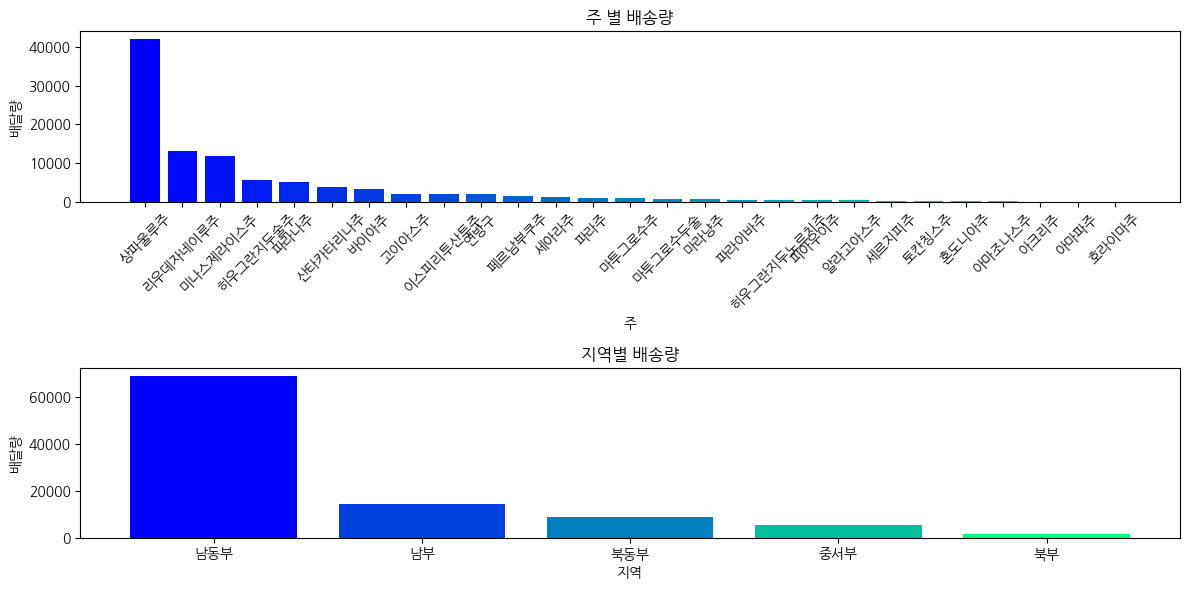

In [ ]:
# 데이터 예시
delivery_counts_state = tmp4['고객 주 한국명'].value_counts()
delivery_counts_region = tmp4['고객 지역'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))

# 주 별 배송량
plt.subplot(2, 1, 1)
state_colors = plt.cm.winter(np.linspace(0, 1, len(delivery_counts_state)))
plt.bar(delivery_counts_state.index, delivery_counts_state.values, color=state_colors)
plt.title('주 별 배송량')
plt.xlabel('주')
plt.ylabel('배달량')
plt.xticks(rotation=45)

# 지역별 배송량
plt.subplot(2, 1, 2)
region_colors = plt.cm.winter(np.linspace(0, 1, len(delivery_counts_region)))
plt.bar(delivery_counts_region.index, delivery_counts_region.values, color=region_colors)
plt.title('지역별 배송량')
plt.xlabel('지역')
plt.ylabel('배달량')

plt.tight_layout()
plt.show()

- 인구 많은 남동부 답게 배송량 많음
- 밀림 많은 북부 배송량 적음

# 배송 예측 성공 OR 실패에 따른 리뷰 점수

In [ ]:
# 날짜 타입으로 변경
tmp2['구매 시간'] = pd.to_datetime(tmp2['구매 시간']).astype('datetime64[ns]')
tmp2['물류 처리 시간'] = pd.to_datetime(tmp2['물류 처리 시간']).astype('datetime64[ns]')
tmp2['실제 배송 날짜'] = pd.to_datetime(tmp2['실제 배송 날짜']).astype('datetime64[ns]')
tmp2['기대 배송 날짜'] = pd.to_datetime(tmp2['기대 배송 날짜']).astype('datetime64[ns]')


In [ ]:
delivery_success = tmp2[tmp2['실제 배송 날짜'] < tmp2['기대 배송 날짜']].shape[0]
delivery_fail = tmp2[tmp2['실제 배송 날짜'] > tmp2['기대 배송 날짜']].shape[0]

In [ ]:
delivery_success, delivery_fail

(80809, 5895)

In [ ]:
# 배송 예측 기간 내에 도착한 것과 배송 예측에 실패한 것 분류
delivery_within_expected = tmp2[tmp2['실제 배송 날짜'] < tmp2['기대 배송 날짜']]
delivery_failed = tmp2[tmp2['실제 배송 날짜'] > tmp2['기대 배송 날짜']]

# 각 그룹의 리뷰 점수 평균 계산
review_score_within_expected = delivery_within_expected['리뷰 점수'].mean()
review_score_failed = delivery_failed['리뷰 점수'].mean()

print("배송 예측 기간 내에 도착한 것의 리뷰 점수 평균:", review_score_within_expected)
print("배송 예측에 실패한 것의 리뷰 점수 평균:", review_score_failed)


배송 예측 기간 내에 도착한 것의 리뷰 점수 평균: 4.286535988384153
배송 예측에 실패한 것의 리뷰 점수 평균: 2.2046717610281346


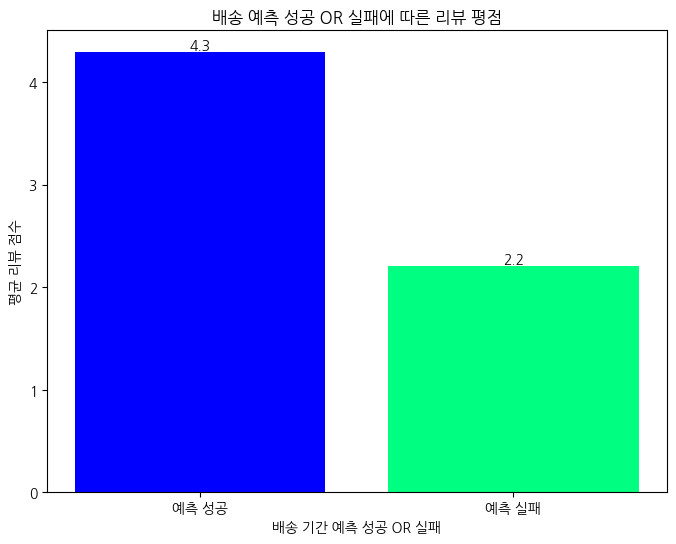

In [ ]:
# 배송 예측 성공 or 실패에 따른 리뷰 점수
x = ['예측 성공', '예측 실패']
y = [review_score_within_expected, review_score_failed]

plt.figure(figsize=(8, 6))

# winter 컬러맵에서 색상 추출
colors = plt.cm.winter(np.linspace(0, 1, len(x)))

bars = plt.bar(x, y, color=colors)

plt.title('배송 예측 성공 OR 실패에 따른 리뷰 평점')
plt.xlabel('배송 기간 예측 성공 OR 실패')
plt.ylabel('평균 리뷰 점수')

# 막대 위에 값 표시
for bar, score in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), f'{score:.1f}', ha='center', va='bottom')

plt.show()

# 지역별 정시 배송 예측 실패

In [ ]:
tmp2[(tmp2['실제 배송 날짜'] > tmp2['기대 배송 날짜'])& (tmp2['고객 지역'] =='남동부')].shape

(3567, 25)

In [ ]:
tmp2[(tmp2['실제 배송 날짜'] > tmp2['기대 배송 날짜'])& (tmp2['고객 지역'] =='남부')].shape

(768, 25)

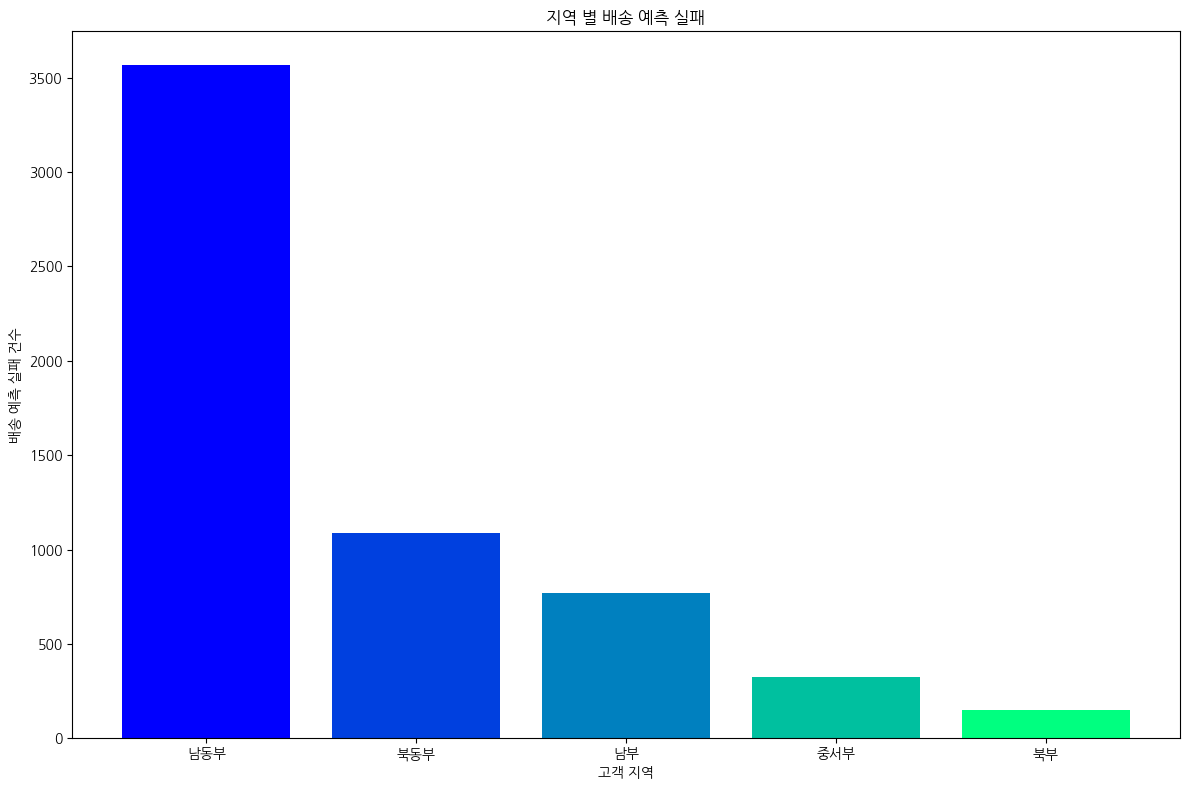

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming tmp2 is the DataFrame we are working with
# Filter the dataset for failed deliveries
delivery_fail_df = tmp2[tmp2['실제 배송 날짜'] > tmp2['기대 배송 날짜']]

# Group by '고객 지역' and count the number of failed deliveries
delivery_fail_by_region = delivery_fail_df.groupby('고객 지역').size().reset_index(name='Count')

# Sort the data by the count of failed deliveries in descending order for better visualization
delivery_fail_by_region = delivery_fail_by_region.sort_values(by='Count', ascending=False)

# Generate colors from a colormap
cmap = plt.get_cmap('winter')  # Use the 'winter' colormap
colors = cmap(np.linspace(0, 1, len(delivery_fail_by_region)))

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(delivery_fail_by_region['고객 지역'], delivery_fail_by_region['Count'], color=colors)
plt.xlabel('고객 지역')
plt.ylabel('배송 예측 실패 건수')
plt.title('지역 별 배송 예측 실패')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


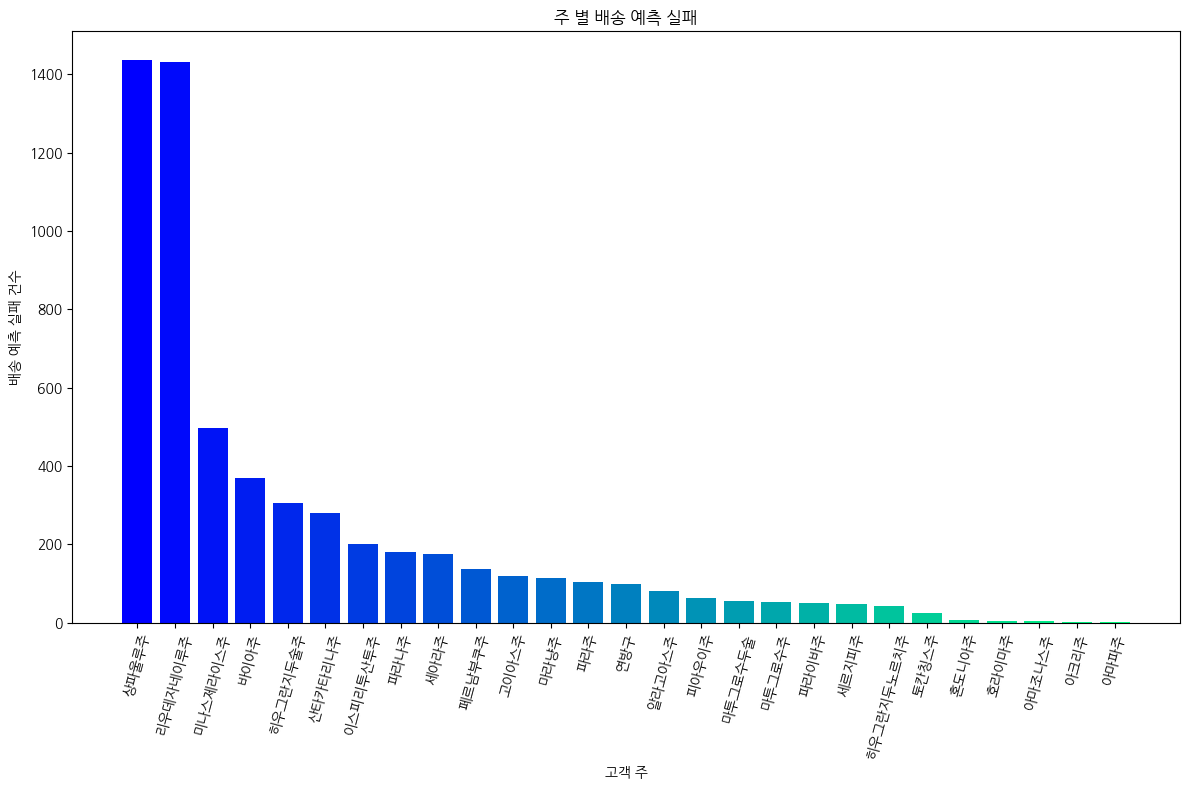

In [ ]:
# Group by '고객 주 한국명' and count the number of failed deliveries
delivery_fail_by_state = delivery_fail_df.groupby('고객 주 한국명').size().reset_index(name='Count')

# Sort the data by the count of failed deliveries in descending order for better visualization
delivery_fail_by_state = delivery_fail_by_state.sort_values(by='Count', ascending=False)

# winter 컬러맵에서 색상 추출
colors = plt.cm.winter(np.linspace(0, 1, len(delivery_fail_by_state)))

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(delivery_fail_by_state['고객 주 한국명'], delivery_fail_by_state['Count'], color=colors)
plt.xlabel('고객 주')
plt.ylabel('배송 예측 실패 건수')
plt.title('주 별 배송 예측 실패')
plt.xticks(rotation=75)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


# tmp5 : tmp4 + sellers

In [ ]:
tmp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100234 entries, 0 to 100233
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   주문 고유 ID     100234 non-null  object         
 1   고객 ID        100234 non-null  object         
 2   주문 상태        100234 non-null  object         
 3   구매 시간        100234 non-null  object         
 4   물류 처리 시간     100234 non-null  object         
 5   실제 배송 날짜     100234 non-null  object         
 6   기대 배송 날짜     100234 non-null  object         
 7   제품 준비 기간     100234 non-null  int64          
 8   실제 배송 기간     100234 non-null  int64          
 9   예상 배송 기간     100234 non-null  int64          
 10  실제 수령 기간     100234 non-null  int64          
 11  고객 고유 ID     100234 non-null  object         
 12  고객 우편번호 앞부분  100234 non-null  float64        
 13  도시           100234 non-null  object         
 14  고객 주         100234 non-null  object         
 15  고객 도시        1002

In [ ]:
tmp4.shape, sellers.shape

((100234, 36), (2763, 6))

In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   판매자 고유 ID     2763 non-null   object
 1   판매자 우편번호 앞부분  2763 non-null   int64 
 2   판매자 도시(city)  2763 non-null   object
 3   판매자 주(state)  2763 non-null   object
 4   주 한국명         2763 non-null   object
 5   지역            2763 non-null   object
dtypes: int64(1), object(5)
memory usage: 129.6+ KB


In [ ]:
# tmp4 + sellers_locations
tmp5 = pd.merge(tmp4, sellers_locations, on='판매자 고유 ID', how='left')
tmp5.shape

(100234, 43)

In [ ]:
# 같은 판매자가 파는 같은 제품을 구매한 서로 다른 고객들의 거주 지역에 따라 품목 화물 가격이 다른 것으로 확인됨
# 거리가 멀수록 품목 화물 가격이 높게 책정되는 것으로 보임
# 다만, 같은 도시 내에서도 가격이 조금 다른 것으로 파악
tmp5[(tmp5['판매자 고유 ID'] == 'SELLER_0491') & (tmp5['제품 고유 ID'] == 'PRODUCT_02093')][['고객 ID','판매자 주 한국명', '판매자 지역', '판매자 우편번호 앞부분','고객 주 한국명', '도시', '고객 지역', '고객 우편번호 앞부분','제품 준비 기간', '실제 배송 기간', '품목 화물 가격','리뷰 점수']]

,고객 ID,판매자 주 한국명,판매자 지역,판매자 우편번호 앞부분,고객 주 한국명,도시,고객 지역,고객 우편번호 앞부분,제품 준비 기간,실제 배송 기간,품목 화물 가격,리뷰 점수
0,CUSTOMER_62232,상파울루주,남동부,9350.0,상파울루주,sao paulo,남동부,3149.0,2,6,8.72,4.0
25866,CUSTOMER_40094,상파울루주,남동부,9350.0,상파울루주,sao paulo,남동부,3366.0,1,0,7.78,4.0
26892,CUSTOMER_50858,상파울루주,남동부,9350.0,상파울루주,sao paulo,남동부,2290.0,1,3,7.78,5.0
32457,CUSTOMER_80968,상파울루주,남동부,9350.0,산타카타리나주,florianopolis,남부,88032.0,3,11,14.10,3.0


In [ ]:
# 판매자 회사의 정확한 위치 좌표를 모르기 때문에 같은 도시 내 거리비교는 어려울 것으로 판단됨
# 그래도, 배송 기간이 길면 품목 화물 가격도 오르는 느낌이 들긴함
locations[locations['우편번호 앞부분'] == 3149], locations[locations['우편번호 앞부분'] == 3366]

(      우편번호 앞부분         도시   주  주 한국명   지역         위도         경도
 1047      3149  sao paulo  SP  상파울루주  남동부 -23.575816 -46.587303,
       우편번호 앞부분         도시   주  주 한국명   지역         위도         경도
 1228      3366  sao paulo  SP  상파울루주  남동부 -23.564238 -46.534603)

In [ ]:
# 다른 판매자도 알아보기
tmp5[(tmp5['판매자 고유 ID'] == 'SELLER_2662')]

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,...,제품 높이(cm),제품 너비(cm),상위 카테고리,판매자 우편번호 앞부분,판매자 도시,판매자 주,판매자 주 한국명,판매자 지역,판매자 위도,판매자 경도
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18,2018-11-22,2018-12-02,2018-12-15,3,9,26,...,10.0,20.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
270,ORDER_00232,CUSTOMER_74938,delivered,2018-10-05,2018-10-06,2018-10-09,2018-10-30,1,3,24,...,20.0,30.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
2125,ORDER_01872,CUSTOMER_30566,delivered,2018-08-28,2018-08-29,2018-09-06,2018-09-15,1,8,17,...,20.0,30.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
4685,ORDER_04171,CUSTOMER_10657,delivered,2019-02-23,2019-02-27,2019-03-08,2019-03-16,4,8,20,...,20.0,30.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
4828,ORDER_04302,CUSTOMER_52492,delivered,2019-06-16,2019-06-20,2019-06-22,2019-07-05,4,1,18,...,20.0,30.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96248,ORDER_84599,CUSTOMER_76665,delivered,2018-10-01,2018-10-04,2018-10-19,2018-10-31,3,14,29,...,20.0,40.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
97679,ORDER_85859,CUSTOMER_09875,delivered,2018-10-03,2018-10-05,2018-10-09,2018-10-25,2,4,21,...,20.0,40.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
98874,ORDER_86916,CUSTOMER_27094,delivered,2019-07-02,2019-07-04,2019-07-12,2019-07-30,1,8,27,...,20.0,30.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
99871,ORDER_87768,CUSTOMER_65206,delivered,2018-11-30,2018-12-04,2018-12-19,2018-12-28,4,14,27,...,20.0,40.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911


In [ ]:
# 다른 판매자도 알아보기
tmp5[(tmp5['판매자 고유 ID'] == 'SELLER_2662') & (tmp5['제품 고유 ID'] == 'PRODUCT_22380')]['품목 화물 가격']

6425     23.58
7793     16.97
10483    21.62
17606    25.22
20929    23.64
24078    18.97
25926    17.92
26331    12.37
29142    36.43
30540    23.02
30885    16.47
32165    36.43
34178    16.92
34989    18.25
43666    20.26
43704    20.26
45420    58.94
50648    20.26
53884    58.84
54259    26.25
62589    21.26
63483    25.48
67169    17.25
67780    18.17
71277    20.26
71906    12.92
77768    20.16
79097    17.25
82522    20.16
82952    18.25
84507    33.22
89885    22.64
92193    41.84
96248    37.51
97679    20.16
99871    45.23
99946    20.26
Name: 품목 화물 가격, dtype: float64

In [ ]:
tmp5[(tmp5['판매자 고유 ID'] == 'SELLER_2662') & (tmp5['제품 고유 ID'] == 'PRODUCT_22380')]

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,...,제품 높이(cm),제품 너비(cm),상위 카테고리,판매자 우편번호 앞부분,판매자 도시,판매자 주,판매자 주 한국명,판매자 지역,판매자 위도,판매자 경도
6425,ORDER_05697,CUSTOMER_62588,delivered,2018-09-17,2018-09-20,2018-09-22,2018-10-04,3,1,16,...,20.0,40.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
7793,ORDER_06899,CUSTOMER_07576,delivered,2019-03-23,2019-03-27,2019-04-03,2019-04-11,3,6,18,...,20.0,40.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
10483,ORDER_09289,CUSTOMER_22589,delivered,2019-03-28,2019-03-29,2019-04-27,2019-04-19,1,28,21,...,20.0,40.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
17606,ORDER_15506,CUSTOMER_54791,delivered,2018-06-10,2018-06-13,2018-06-16,2018-07-13,2,3,32,...,20.0,40.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
20929,ORDER_18439,CUSTOMER_74776,delivered,2018-10-20,2018-10-24,2018-11-09,2018-11-13,4,16,23,...,20.0,40.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
24078,ORDER_21199,CUSTOMER_86344,delivered,2019-04-01,2019-04-04,2019-04-16,2019-04-23,3,11,21,...,20.0,40.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
25926,ORDER_22809,CUSTOMER_85612,delivered,2019-02-08,2019-02-14,2019-02-24,2019-03-05,5,9,24,...,20.0,40.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
26331,ORDER_23168,CUSTOMER_77418,delivered,2019-02-28,2019-03-06,2019-03-07,2019-03-13,5,1,12,...,20.0,40.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
29142,ORDER_25646,CUSTOMER_76502,delivered,2018-12-04,2018-12-07,2018-12-12,2018-12-27,2,4,22,...,20.0,40.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911
30540,ORDER_26851,CUSTOMER_17629,delivered,2018-10-16,2018-10-18,2018-10-24,2018-11-03,2,5,17,...,20.0,40.0,pets,31842.0,belo horizonte,MG,미나스제라이스주,남동부,-19.836541,-43.921911


In [ ]:
# 일단 대체적으로는 같은 주인 남동부가 하위권
# 배송 오래걸릴수록 리뷰 점수 박살나는 케이스 종종 발견 ->> 제품 자체 퀄리티 요소도 있어 절대적이라고는 못함
# 미나스제라이스주는 상파울루 바로 옆주라 판매자가 북부인 케이스를 찾아봐야할듯

tmp5[(tmp5['판매자 고유 ID'] == 'SELLER_2662') & (tmp5['제품 고유 ID'] == 'PRODUCT_22380')][['고객 ID','판매자 주 한국명', '판매자 지역', '판매자 우편번호 앞부분','고객 주 한국명', '도시', '고객 지역', '고객 우편번호 앞부분','제품 준비 기간', '실제 배송 기간', '품목 화물 가격','리뷰 점수']].sort_values(by='품목 화물 가격', ascending=False)

,고객 ID,판매자 주 한국명,판매자 지역,판매자 우편번호 앞부분,고객 주 한국명,도시,고객 지역,고객 우편번호 앞부분,제품 준비 기간,실제 배송 기간,품목 화물 가격,리뷰 점수
45420,CUSTOMER_25593,미나스제라이스주,남동부,31842.0,페르남부쿠주,recife,북동부,50770.0,2,5,58.94,5.0
53884,CUSTOMER_73270,미나스제라이스주,남동부,31842.0,파라주,belem,북부,66083.0,3,15,58.84,5.0
99871,CUSTOMER_65206,미나스제라이스주,남동부,31842.0,리우데자네이루주,parati,남동부,23970.0,4,14,45.23,3.0
92193,CUSTOMER_08922,미나스제라이스주,남동부,31842.0,파라나주,curitiba,남부,80730.0,3,10,41.84,5.0
96248,CUSTOMER_76665,미나스제라이스주,남동부,31842.0,파라나주,manoel ribas,남부,85260.0,3,14,37.51,1.0
29142,CUSTOMER_76502,미나스제라이스주,남동부,31842.0,상파울루주,mogi das cruzes,남동부,8773.0,2,4,36.43,5.0
32165,CUSTOMER_61131,미나스제라이스주,남동부,31842.0,상파울루주,americana,남동부,13478.0,7,23,36.43,5.0
84507,CUSTOMER_27882,미나스제라이스주,남동부,31842.0,마투그로수주,caceres,중서부,78200.0,5,24,33.22,5.0
54259,CUSTOMER_10928,미나스제라이스주,남동부,31842.0,미나스제라이스주,varginha,남동부,37062.0,4,6,26.25,5.0
63483,CUSTOMER_86162,미나스제라이스주,남동부,31842.0,파라나주,santa helena,남부,85892.0,3,7,25.48,3.0


In [ ]:
tmp5[tmp5['판매자 지역'] == '북부']

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,제품 준비 기간,실제 배송 기간,예상 배송 기간,...,제품 높이(cm),제품 너비(cm),상위 카테고리,판매자 우편번호 앞부분,판매자 도시,판매자 주,판매자 주 한국명,판매자 지역,판매자 위도,판매자 경도
9200,ORDER_08142,CUSTOMER_39949,delivered,2018-03-15,2018-03-17,2018-04-07,2018-04-18,1,21,33,...,9.0,12.0,electronics,69005.0,manaus,AM,아마조나스주,북부,-3.135971,-60.022519
11986,ORDER_10600,CUSTOMER_41444,delivered,2018-05-29,2018-05-31,2018-06-22,2018-07-03,1,21,34,...,7.0,20.0,automotive,76804.0,porto velho,RO,혼도니아주,북부,-8.765999,-63.893260
31174,ORDER_27405,CUSTOMER_74230,delivered,2018-04-29,2018-05-02,2018-05-15,2018-06-13,2,12,44,...,20.0,57.0,automotive,76804.0,porto velho,RO,혼도니아주,북부,-8.765999,-63.893260
37273,ORDER_32779,CUSTOMER_63892,delivered,2018-07-11,2018-07-13,2018-08-01,2018-08-14,2,19,33,...,8.0,14.0,automotive,76804.0,porto velho,RO,혼도니아주,북부,-8.765999,-63.893260
59928,ORDER_52726,CUSTOMER_13862,delivered,2018-05-21,2018-05-22,2018-05-30,2018-06-26,1,7,35,...,7.0,20.0,automotive,76804.0,porto velho,RO,혼도니아주,북부,-8.765999,-63.893260
70606,ORDER_62076,CUSTOMER_83888,delivered,2018-02-03,2018-02-06,2018-05-05,2018-03-28,3,87,52,...,6.0,11.0,electronics,69005.0,manaus,AM,아마조나스주,북부,-3.135971,-60.022519
73148,ORDER_64325,CUSTOMER_30478,delivered,2018-03-12,2018-03-17,2018-04-11,2018-04-11,4,24,29,...,10.0,12.0,electronics,69005.0,manaus,AM,아마조나스주,북부,-3.135971,-60.022519
79112,ORDER_69617,CUSTOMER_06270,delivered,2018-08-29,2018-08-30,2018-09-13,2018-10-03,1,13,34,...,18.0,19.0,automotive,76804.0,porto velho,RO,혼도니아주,북부,-8.765999,-63.893260
95880,ORDER_84267,CUSTOMER_60436,delivered,2018-08-03,2018-08-03,2018-08-07,2018-10-02,0,3,59,...,8.0,14.0,automotive,76804.0,porto velho,RO,혼도니아주,북부,-8.765999,-63.893260
